# XYZcorporation_lending Data

In [1]:
import numpy as np
import pandas as pd
from numpy import random
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_table(r"C:\Users\91949\Desktop\XYZCorp_LendingData.txt",low_memory=False,delimiter="\t", header=0)

In [3]:
pd.set_option('display.max_columns', None)

In [4]:
data.shape

(855969, 73)

In [5]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [6]:
data.default_ind.value_counts()

0    809502
1     46467
Name: default_ind, dtype: int64

In [7]:
train=data.iloc[0:450000,:]
test=data.iloc[450000:,0:72]
train.shape

(450000, 73)

In [8]:
train.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-2011,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-1985,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-2015,171.62,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-2011,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-1999,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-2013,119.66,NaN,Sep-2013,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-2011,n,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-2001,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-2014,649.91,NaN,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-1996,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-2015,357.48,NaN,Jan-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-2011,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-1996,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-2016,67.79,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0


In [9]:
test.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
450000,10071047,11922478,15000.0,15000.0,15000.0,60 months,16.24,366.69,C,C5,Sr. Regional Manager,2 years,RENT,120000.0,Source Verified,Jan-2014,n,NaN,debt_consolidation,Debt Consolidation,770xx,TX,17.63,0.0,Aug-2004,0.0,36.0,NaN,23.0,0.0,14805.0,50.0,35.0,f,10394.81,10394.81,8800.520000,8800.52,4605.19,4195.33,0.0,0.0,0.0,Jan-2016,366.69,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,90.0,280698.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,29600.0,NaN,NaN,NaN
450001,10071008,11922448,7200.0,7200.0,7200.0,36 months,13.98,246.01,C,C1,Treasury Analyst,8 years,MORTGAGE,90000.0,Source Verified,Jan-2014,n,Borrower added on 01/03/14 > I am requested ...,debt_consolidation,Debt Consolidation,068xx,CT,9.41,2.0,May-1995,2.0,12.0,55.0,10.0,2.0,3734.0,53.3,33.0,f,2740.38,2740.38,5903.920000,5903.92,4459.62,1444.30,0.0,0.0,0.0,Jan-2016,246.01,Feb-2016,Jan-2016,0.0,20.0,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,4723.0,412992.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7000.0,NaN,NaN,NaN
450002,8655233,10427340,12000.0,12000.0,11950.0,36 months,9.67,385.35,B,B1,Director,10+ years,MORTGAGE,99000.0,Verified,Jan-2014,n,Borrower added on 01/03/14 > paying off my o...,debt_consolidation,lowering lending club payment,721xx,AR,22.36,1.0,Feb-1998,0.0,17.0,NaN,5.0,0.0,1250.0,62.5,20.0,f,0.00,0.00,13141.246926,13086.49,12000.00,1141.25,0.0,0.0,0.0,Mar-2015,8132.31,NaN,Mar-2015,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,286.0,196153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000.0,NaN,NaN,NaN
450003,10071069,11922493,4500.0,4500.0,4500.0,36 months,14.98,155.95,C,C3,Sales Merchandiser,3 years,MORTGAGE,28000.0,Verified,Jan-2014,n,Borrower added on 01/03/14 > Debt consolidat...,debt_consolidation,Consolidation,781xx,TX,24.56,0.0,Sep-1999,2.0,NaN,NaN,13.0,0.0,8350.0,69.0,17.0,f,1728.14,1728.14,3742.580000,3742.58,2771.86,970.72,0.0,0.0,0.0,Jan-2016,155.95,Feb-2016,Jan-2016,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,20974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12100.0,NaN,NaN,NaN
450004,10069685,11921275,8000.0,8000.0,8000.0,36 months,14.98,277.25,C,C3,IT Manager,< 1 year,MORTGAGE,75000.0,Source Verified,Jan-2014,n,NaN,debt_consolidation,Debt consolidation,773xx,TX,14.43,1.0,Jun-2003,0.0,2.0,NaN,13.0,0.0,10885.0,77.2,27.0,f,0.00,0.00,9677.180000,9677.18,8000.00,1677.18,0.0,0.0,0.0,Nov-2015,3854.93,NaN,Jan-2016,0.0,22.0,1.0,INDIVIDUAL,NaN,NaN,NaN,1.0,0.0,136246.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14100.0,NaN,NaN,NaN


# Cleaning-Train Data

In [10]:
#Droping missing value columns having more than 50% null values
train=train.drop(["id","member_id","inq_last_12m","total_cu_tl","inq_fi","all_util","max_bal_bc","open_rv_24m","open_rv_12m","il_util","total_bal_il","mths_since_rcnt_il","open_il_24m","open_il_12m","open_il_6m","open_acc_6m","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq","desc","next_pymnt_d"],axis=1)

In [11]:
train.shape

(450000, 49)

In [12]:
train.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     26487
emp_length                    20260
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            18
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      290
total_acc                   

# Missing value treatment for train

In [13]:
train.emp_title.value_counts()

Teacher                            5190
Manager                            4273
Registered Nurse                   2237
RN                                 2130
Supervisor                         1887
                                   ... 
Jones County Board of Education       1
Taco John's International             1
Walker's Service                      1
apcco                                 1
Project Controller                    1
Name: emp_title, Length: 199759, dtype: int64

In [14]:
train.emp_title=train.emp_title.fillna("Admissions Producer")

In [15]:
train.emp_length.value_counts()

10+ years    145263
2 years       39870
3 years       35246
< 1 year      34703
5 years       29770
1 year        28448
4 years       27075
7 years       25342
6 years       25211
8 years       21609
9 years       17203
Name: emp_length, dtype: int64

In [16]:
train.emp_length=train.emp_length.fillna("9 years")

In [17]:
train.title.value_counts()

Debt consolidation                          158333
Credit card refinancing                      60506
Debt Consolidation                           15325
Home improvement                             14340
Other                                        12279
                                             ...  
A Solid Consolidation                            1
front porch                                      1
Refinance current LC Loan plus Med Bills         1
Home Improvement/Roof                            1
Refinance Debt                                   1
Name: title, Length: 60584, dtype: int64

In [18]:
train.title=train.title.fillna("Refinance Debt")

In [19]:
train.revol_util.value_counts()

0.00     2169
58.00     837
53.00     820
59.00     805
61.00     802
         ... 
26.33       1
81.31       1
2.64        1
0.75        1
33.39       1
Name: revol_util, Length: 1251, dtype: int64

In [20]:
train.revol_util=train.revol_util.fillna(train.revol_util.median())

In [21]:
train.last_pymnt_d.value_counts()

Jan-2016    176707
Dec-2015     57713
Jul-2015     11623
Mar-2015     10028
Jun-2015     10020
             ...  
Jun-2008        10
Nov-2008        10
Mar-2008         5
Jan-2008         4
Feb-2008         1
Name: last_pymnt_d, Length: 97, dtype: int64

In [22]:
train.last_pymnt_d=train.last_pymnt_d.fillna("Feb-2008")

In [23]:
train.last_credit_pull_d.value_counts()

Jan-2016    314163
Dec-2015     13842
Nov-2015      8280
Sep-2015      7922
Oct-2015      7832
             ...  
May-2008         1
Jun-2008         1
Jul-2008         1
May-2007         1
Jul-2007         1
Name: last_credit_pull_d, Length: 102, dtype: int64

In [24]:
train.last_credit_pull_d=train.last_credit_pull_d.fillna("Jul-2007")

In [25]:
train.collections_12_mths_ex_med.value_counts()

0.0     446193
1.0       3509
2.0        214
3.0         18
4.0          6
6.0          1
16.0         1
20.0         1
5.0          1
Name: collections_12_mths_ex_med, dtype: int64

In [26]:
train.collections_12_mths_ex_med=train.collections_12_mths_ex_med.fillna(5.0)

In [27]:
train.total_rev_hi_lim.value_counts()

15000.0    1339
13500.0    1272
10000.0    1262
12000.0    1257
14500.0    1245
           ... 
30240.0       1
70701.0       1
15511.0       1
15428.0       1
96310.0       1
Name: total_rev_hi_lim, Length: 14384, dtype: int64

In [28]:
train.total_rev_hi_lim=train.total_rev_hi_lim.fillna(train.total_rev_hi_lim.median())

In [29]:
train.tot_cur_bal.value_counts()

0.0         75
23254.0     15
14186.0     14
30491.0     14
28674.0     14
            ..
144322.0     1
400815.0     1
314452.0     1
207170.0     1
101575.0     1
Name: tot_cur_bal, Length: 216304, dtype: int64

In [30]:
train.tot_cur_bal=train.tot_cur_bal.fillna(train.tot_cur_bal.median())

In [31]:
train.tot_coll_amt.value_counts()

0.0        334933
50.0          800
100.0         620
75.0          492
60.0          296
            ...  
21500.0         1
15729.0         1
7214.0          1
4077.0          1
9986.0          1
Name: tot_coll_amt, Length: 6180, dtype: int64

In [32]:
train.tot_coll_amt=train.tot_coll_amt.fillna(train.tot_coll_amt.median())

In [33]:
train.isnull().sum()

loan_amnt                     0
funded_amnt                   0
funded_amnt_inv               0
term                          0
int_rate                      0
installment                   0
grade                         0
sub_grade                     0
emp_title                     0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
title                         0
zip_code                      0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
out_prncp_inv                 0
total_py

# Convert Categorical Value To Numerical Value

In [34]:
train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [35]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [36]:
train.term=le.fit_transform(train.term)

In [37]:
train.grade=le.fit_transform(train.grade)

In [38]:
train.sub_grade=le.fit_transform(train.sub_grade)

In [39]:
train.emp_title=le.fit_transform(train.emp_title)

In [40]:
train.emp_length=le.fit_transform(train.emp_length)

In [41]:
train.home_ownership=le.fit_transform(train.home_ownership)

In [42]:
train.verification_status=le.fit_transform(train.verification_status)

In [43]:
train.issue_d=le.fit_transform(train.issue_d)

In [44]:
train.pymnt_plan=le.fit_transform(train.pymnt_plan)

In [45]:
train.purpose=le.fit_transform(train.purpose)

In [46]:
train.title=le.fit_transform(train.title)

In [47]:
train.zip_code=le.fit_transform(train.zip_code)

In [48]:
train.addr_state=le.fit_transform(train.addr_state)

In [49]:
train.earliest_cr_line=le.fit_transform(train.earliest_cr_line)

In [50]:
train.initial_list_status=le.fit_transform(train.initial_list_status)

In [51]:
train.last_pymnt_d=le.fit_transform(train.last_pymnt_d)

In [52]:
train.last_credit_pull_d=le.fit_transform(train.last_credit_pull_d)

In [53]:
train.application_type=le.fit_transform(train.application_type)

In [54]:
train.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int32
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

# Test Data Cleaning Part

In [55]:
test=test.drop(["id","member_id","inq_last_12m","total_cu_tl","inq_fi","all_util","max_bal_bc","open_rv_24m","open_rv_12m","il_util","total_bal_il","mths_since_rcnt_il","open_il_24m","open_il_12m","open_il_6m","open_acc_6m","verification_status_joint","dti_joint","annual_inc_joint","mths_since_last_major_derog","mths_since_last_record","mths_since_last_delinq","desc","next_pymnt_d"],axis=1)

In [56]:
test.isnull().sum()

loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                     22956
emp_length                    22801
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
pymnt_plan                        0
purpose                           0
title                            15
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths                    0
open_acc                          0
pub_rec                           0
revol_bal                         0
revol_util                      156
total_acc                   

# Missing value treatment for test

In [57]:
test.emp_title.value_counts()

Teacher                            7775
Manager                            6548
Owner                              3685
Registered Nurse                   3104
RN                                 3052
                                   ... 
State Parole Agent                    1
NURSING AID & COUNCILOR               1
Sr Systems Technician                 1
Consultant-lawyer                     1
Manager Hotel Operations Oasis        1
Name: emp_title, Length: 117250, dtype: int64

In [58]:
test.emp_title=test.emp_title.fillna("Manager Hotel Operations Oasis")

In [59]:
test.emp_length.value_counts()

10+ years    136827
2 years       36116
< 1 year      32894
3 years       32146
1 year        26407
5 years       24042
4 years       23568
8 years       20812
7 years       17862
9 years       16259
6 years       16235
Name: emp_length, dtype: int64

In [60]:
test.emp_length=test.emp_length.fillna("6 years")

In [61]:
test.title.value_counts()

Debt consolidation                239756
Credit card refinancing            98722
Home improvement                   24293
Other                              18243
Major purchase                      7061
                                   ...  
To put all debt in one payment         1
Finite                                 1
Debt Consoildation                     1
Refinance Loan                         1
Student Loan                           1
Name: title, Length: 1000, dtype: int64

In [62]:
test.title=test.title.fillna("Student Loan")

In [63]:
test.revol_util.value_counts()

0.0      1192
59.0      889
52.0      887
58.0      886
53.0      882
         ... 
118.6       1
182.8       1
126.0       1
145.8       1
184.6       1
Name: revol_util, Length: 1205, dtype: int64

In [64]:
test.revol_util=test.revol_util.fillna(test.revol_util.median())

In [65]:
test.last_pymnt_d.value_counts()

Jan-2016    290803
Dec-2015     85070
Oct-2015      3366
Nov-2015      3255
Aug-2015      3143
Jul-2015      2849
Sep-2015      2808
Jun-2015      1957
May-2015      1500
Apr-2015      1121
Mar-2015       727
Feb-2015       408
Jan-2015        88
Oct-2014        53
Jun-2014        43
Sep-2014        37
Jul-2014        37
Nov-2014        36
Dec-2014        35
Aug-2014        35
Apr-2014        32
Feb-2014        28
May-2014        24
Mar-2014        14
Name: last_pymnt_d, dtype: int64

In [66]:
test.last_pymnt_d=test.last_pymnt_d.fillna("Mar-2014")

In [67]:
test.last_credit_pull_d.value_counts()

Jan-2016    387524
Dec-2015      5197
Nov-2015      3108
Oct-2015      2458
Sep-2015      2063
Aug-2015      1431
Jul-2015      1328
Jun-2015       935
May-2015       595
Apr-2015       491
Mar-2015       326
Feb-2015       204
Jan-2015       152
Dec-2014        33
Nov-2014        19
Oct-2014        18
Sep-2014        16
Jun-2014        14
Aug-2014        12
Jul-2014         9
May-2014         9
Apr-2014         7
Feb-2014         5
Mar-2014         3
Jan-2014         2
Name: last_credit_pull_d, dtype: int64

In [68]:
test.last_credit_pull_d=test.last_credit_pull_d.fillna("Jan-2014")

In [69]:
#test.isnull().sum()

# Convert Categorical Value To Numerical Value

In [70]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [71]:
test.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                           object
int_rate                      float64
installment                   float64
grade                          object
sub_grade                      object
emp_title                      object
emp_length                     object
home_ownership                 object
annual_inc                    float64
verification_status            object
issue_d                        object
pymnt_plan                     object
purpose                        object
title                          object
zip_code                       object
addr_state                     object
dti                           float64
delinq_2yrs                   float64
earliest_cr_line               object
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [72]:
test.term=le.fit_transform(test.term)

In [73]:
test.grade=le.fit_transform(test.grade)

In [74]:
test.sub_grade=le.fit_transform(test.sub_grade)

In [75]:
test.emp_title=le.fit_transform(test.emp_title)

In [76]:
test.emp_length=le.fit_transform(test.emp_length)

In [77]:
test.home_ownership=le.fit_transform(test.home_ownership)

In [78]:
test.verification_status=le.fit_transform(test.verification_status)

In [79]:
test.issue_d=le.fit_transform(test.issue_d)

In [80]:
test.pymnt_plan=le.fit_transform(test.pymnt_plan)

In [81]:
test.purpose=le.fit_transform(test.purpose)

In [82]:
test.title=le.fit_transform(test.title)

In [83]:
test.zip_code=le.fit_transform(test.zip_code)

In [84]:
test.addr_state=le.fit_transform(test.addr_state)

In [85]:
test.earliest_cr_line=le.fit_transform(test.earliest_cr_line)

In [86]:
test.initial_list_status=le.fit_transform(test.initial_list_status)

In [87]:
test.last_pymnt_d=le.fit_transform(test.last_pymnt_d)

In [88]:
test.last_credit_pull_d=le.fit_transform(test.last_credit_pull_d)

In [89]:
test.application_type=le.fit_transform(test.application_type)

In [90]:
test.dtypes

loan_amnt                     float64
funded_amnt                   float64
funded_amnt_inv               float64
term                            int32
int_rate                      float64
installment                   float64
grade                           int32
sub_grade                       int32
emp_title                       int32
emp_length                      int32
home_ownership                  int32
annual_inc                    float64
verification_status             int32
issue_d                         int32
pymnt_plan                      int32
purpose                         int32
title                           int32
zip_code                        int32
addr_state                      int32
dti                           float64
delinq_2yrs                   float64
earliest_cr_line                int32
inq_last_6mths                float64
open_acc                      float64
pub_rec                       float64
revol_bal                     float64
revol_util  

In [91]:
corr = train.corr()
corr

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
loan_amnt,1.000000,0.998553,0.995297,0.412384,0.165195,0.949588,0.165581,0.173379,-0.003847,-0.073513,-0.206785,0.369891,0.364541,-0.002429,0.001060,-0.154457,-0.123353,-0.008709,0.019137,0.056215,0.005707,-0.013635,-0.010105,0.203921,-0.081747,0.338654,0.116937,0.234161,0.074151,0.510426,0.510386,0.745412,0.745170,0.616749,0.714220,0.037776,0.113809,0.081287,-0.033587,0.309187,-0.024482,-0.012201,NaN,NaN,0.006409,-0.002015,0.320978,0.275491,0.008691
funded_amnt,0.998553,1.000000,0.997026,0.410321,0.165951,0.951719,0.165347,0.172992,-0.003508,-0.073541,-0.206564,0.369367,0.363737,-0.002415,0.001070,-0.156099,-0.124677,-0.008612,0.019385,0.057577,0.006263,-0.013506,-0.010420,0.204771,-0.081202,0.338389,0.118087,0.234071,0.076497,0.513137,0.513099,0.744943,0.745003,0.616306,0.713984,0.037375,0.113496,0.081164,-0.033900,0.309136,-0.024989,-0.011980,NaN,NaN,0.006595,-0.001982,0.322504,0.276475,0.007810
funded_amnt_inv,0.995297,0.997026,1.000000,0.410958,0.167592,0.948493,0.164223,0.171803,-0.003090,-0.073558,-0.206628,0.367785,0.364701,0.000083,0.001053,-0.159444,-0.127503,-0.008306,0.019610,0.060915,0.007040,-0.013289,-0.011951,0.205694,-0.079805,0.337195,0.120045,0.234416,0.081193,0.516321,0.516293,0.740523,0.746302,0.611840,0.712280,0.033939,0.111908,0.078787,-0.034269,0.308159,-0.025551,-0.014380,NaN,NaN,0.006924,-0.001906,0.323926,0.277036,0.005038
term,0.412384,0.410321,0.410958,1.000000,0.442231,0.158762,0.455667,0.467128,0.016314,-0.044202,-0.120664,0.069907,0.261645,0.022949,-0.000157,-0.040834,-0.050923,-0.031514,0.025140,0.090797,0.003942,-0.002038,0.016280,0.077318,-0.022322,0.097037,0.083714,0.100834,0.100856,0.427935,0.427904,0.176996,0.178518,0.014396,0.533217,0.009006,0.093185,0.059170,-0.046428,0.115772,-0.027899,-0.002475,NaN,NaN,0.007638,-0.001458,0.115336,0.059706,0.059222
int_rate,0.165195,0.165951,0.167592,0.442231,1.000000,0.146893,0.954545,0.976903,0.020998,-0.005822,0.064194,-0.046941,0.235869,-0.014666,0.000259,0.134982,0.048086,-0.003442,0.007240,0.159175,0.079897,0.002145,0.213884,0.010645,0.067440,-0.004338,0.325438,-0.034497,-0.009973,0.124475,0.124497,0.129617,0.131805,-0.026511,0.482172,0.052260,0.132394,0.086095,-0.001784,0.082557,-0.012625,0.013245,NaN,NaN,0.030750,0.001401,-0.072450,-0.125926,0.166455
installment,0.949588,0.951719,0.948493,0.158762,0.146893,1.000000,0.138702,0.145546,-0.006561,-0.064723,-0.171915,0.366949,0.333043,-0.012219,0.001527,-0.141977,-0.112344,0.000902,0.013123,0.048965,0.015923,-0.013495,0.012566,0.196561,-0.070884,0.326345,0.136322,0.214739,0.042064,0.400117,0.400089,0.765698,0.765531,0.666820,0.640111,0.046245,0.108545,0.078959,-0.018936,0.304732,-0.017712,-0.010368,NaN,NaN,0.009209,-0.001513,0.292629,0.257459,0.011351
grade,0.165581,0.165347,0.164223,0.455667,0.954545,0.138702,1.000000,0.977000,0.022489,-0.004760,0.061204,-0.038514,0.212917,-0.000865,0.000468,0.145573,0.024894,-0.008111,0.007213,0.147594,0.079909,0.002912,0.203841,0.012251,0.067377,-0.003005,0.295712,-0.029891,0.010865,0.156073,0.156103,0.100489,0.099733,-0.052268,0.459334,0.056201,0.126480,0.086119,-0.011608,0.069693,-0.016478,0.018509,NaN,NaN,0.030660,0.001263,-0.067768,-0.114321,0.156288
sub_grade,0.173379,0.172992,0.171803,0.467128,0.976903,0.145546,0.977000,1.000000,0.022961,-0.005099,0.063665,-0.038686,0.221631,-0.003140,0.000483,0.148641,0.024975,-0.007767,0.007743,0.152139,0.081

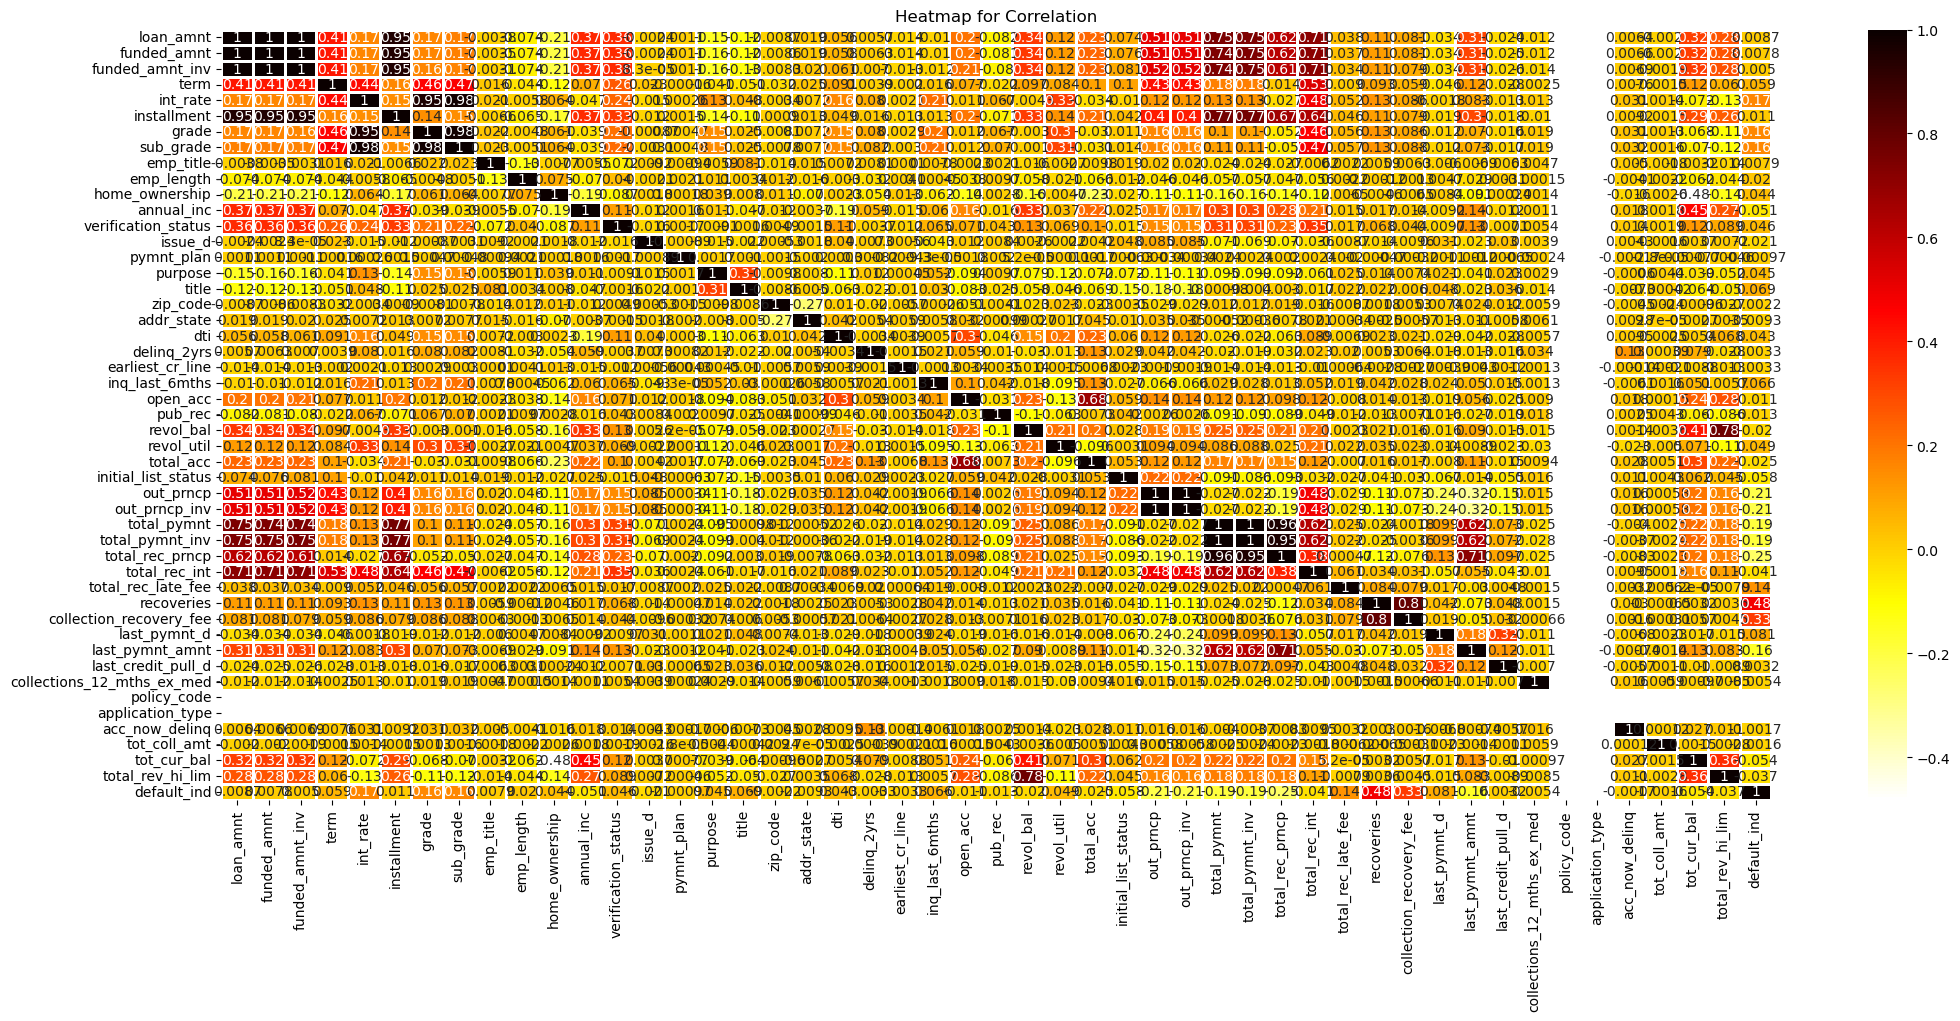

In [92]:
plt.figure(figsize=(25,10))
Heatmap=sns.heatmap(corr,linewidth=1,annot=True,cmap="hot_r")
plt.title("Heatmap for Correlation")
plt.show()

# Data Visualization

<AxesSubplot:xlabel='default_ind', ylabel='count'>

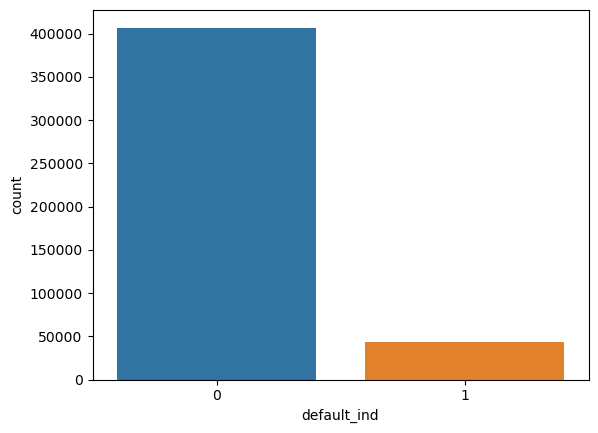

In [93]:
sns.countplot("default_ind",data=train)

<AxesSubplot:xlabel='initial_list_status', ylabel='count'>

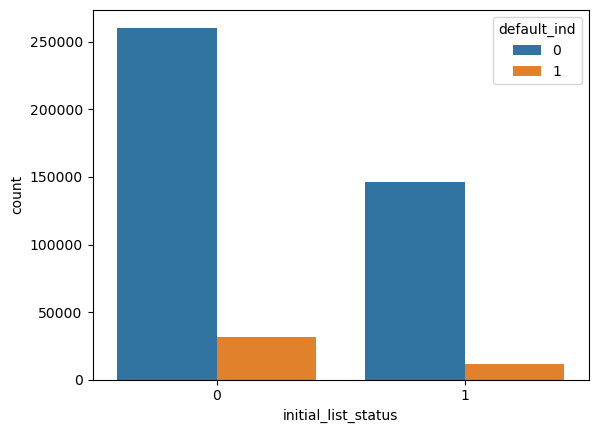

In [94]:
sns.countplot('initial_list_status',data=train,hue='default_ind')

<AxesSubplot:xlabel='verification_status', ylabel='count'>

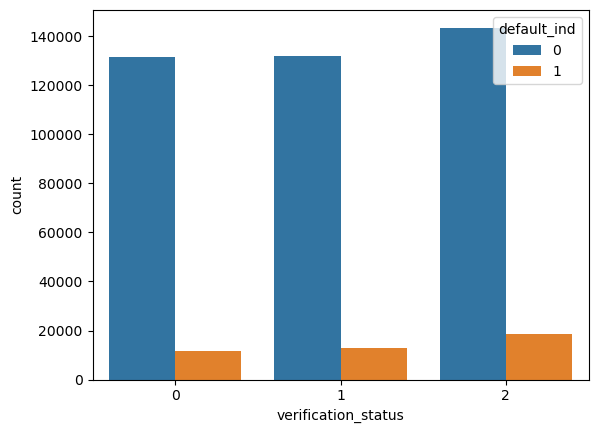

In [95]:
sns.countplot('verification_status',data=train,hue='default_ind')

# Model Building Without Treating Outliers

In [96]:
t_x=train.iloc[:,0:-1]
t_y=train.iloc[:,-1]

In [97]:
t_x.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,5000.0,5000.0,4975.0,0,10.65,162.87,1,6,5820,1,5,24000.0,2,19,0,1,8521,758,3,27.65,0.0,249,1.0,3.0,0.0,13648.0,83.7,9.0,0,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,39,171.62,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0
1,2500.0,2500.0,2500.0,1,15.27,59.83,2,13,128177,10,5,30000.0,1,19,0,0,47819,285,10,1.00,0.0,39,5.0,3.0,0.0,1687.0,9.4,4.0,0,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,5,119.66,99,0.0,1.0,0,0.0,0.0,82071.0,22900.0
2,2400.0,2400.0,2400.0,0,15.96,84.33,2,14,5820,1,5,12252.0,0,19,0,11,58236,540,14,8.72,0.0,542,2.0,2.0,0.0,2956.0,98.5,10.0,0,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,55,649.91,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0
3,10000.0,10000.0,10000.0,0,13.49,339.31,2,10,2175,1,5,49200.0,1,19,0,9,57923,802,4,20.00,0.0,197,1.0,10.0,0.0,5598.0,21.0,37.0,0,0.0,0.0,12226.302212,12226.30,10000.00,2209.33,16.97,0.00,0.00,39,357.48,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0
4,3000.0,3000.0,3000.0,1,12.69,67.79,1,9,161224,0,5,80000.0,1,19,0,9,37791,855,36,17.94,0.0,260,0.0,15.0,0.0,27783.0,53.9,38.0,0,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,40,67.79,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0


In [98]:
t_y.head()

0    0
1    1
2    0
3    0
4    0
Name: default_ind, dtype: int64

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x_tr,x_te,y_tr,y_te=train_test_split(t_x,t_y,test_size=0.2,random_state=50)

In [101]:
x_tr.shape,x_te.shape,y_tr.shape,y_te.shape

((360000, 48), (90000, 48), (360000,), (90000,))

# Logistic Regression

In [102]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [103]:
lg.fit(x_tr,y_tr)

LogisticRegression()

In [104]:
lg_p=lg.predict(x_te)

In [105]:
cf1=confusion_matrix(lg_p,y_te)
cf1

array([[81221,   334],
       [   42,  8403]], dtype=int64)

In [106]:
acc1=cf1.diagonal().sum()/cf1.sum()*100
acc1

99.58222222222223

In [107]:
lg_f1=f1_score(lg_p,y_te)
lg_f1

0.9781166336864161

In [108]:
lg_pe=precision_score(lg_p,y_te)
lg_pe

0.9617717752088818

In [109]:
lg_re=recall_score(lg_p,y_te)
lg_re

0.9950266429840142

In [110]:
print(classification_report(lg_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81555
           1       0.96      1.00      0.98      8445

    accuracy                           1.00     90000
   macro avg       0.98      1.00      0.99     90000
weighted avg       1.00      1.00      1.00     90000



# ROC Curve

In [111]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,lg_p)

Text(0.5, 1.0, 'ROC-Curve')

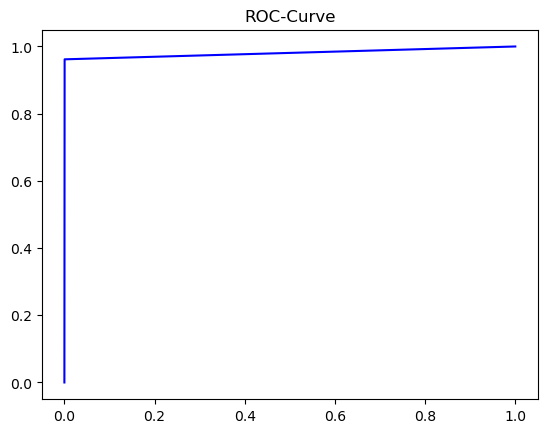

In [112]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Decision Tree

In [113]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

In [114]:
dt.fit(x_tr,y_tr)

DecisionTreeClassifier()

In [115]:
dt_p=dt.predict(x_te)

In [116]:
dt_cf=confusion_matrix(dt_p,y_te)
dt_cf

array([[81206,    54],
       [   57,  8683]], dtype=int64)

In [117]:
dt_f1=f1_score(dt_p,y_te)
dt_f1

0.9936487955598787

In [118]:
dt_pe=precision_score(dt_p,y_te)
dt_pe

0.9938193888062264

In [119]:
dt_re=recall_score(dt_p,y_te)
dt_re

0.9934782608695653

In [120]:
dt_acc1=dt_cf.diagonal().sum()/dt_cf.sum()*100
dt_acc1

99.87666666666667

In [121]:
print(classification_report(dt_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81260
           1       0.99      0.99      0.99      8740

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# ROC_Curve

In [122]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,dt_p)

Text(0.5, 1.0, 'ROC-Curve')

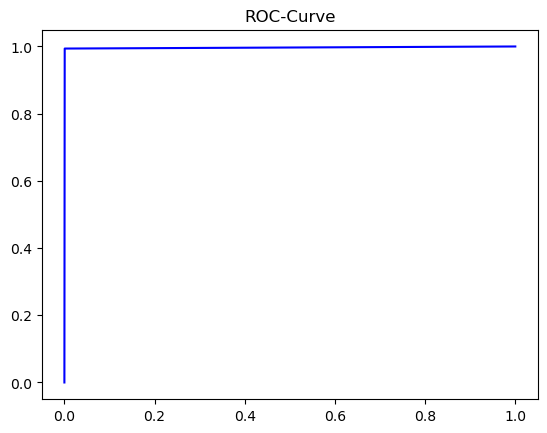

In [123]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Random Forest

In [124]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()

In [125]:
rf.fit(x_tr,y_tr)

RandomForestClassifier()

In [126]:
rf_p=rf.predict(x_te)
rf_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [127]:
rf_cf=confusion_matrix(rf_p,y_te)
rf_cf

array([[81263,   119],
       [    0,  8618]], dtype=int64)

In [128]:
rf_f1=f1_score(rf_p,y_te)
rf_f1

0.9931431864016134

In [129]:
rf_pe=precision_score(rf_p,y_te)
rf_pe

0.9863797642211285

In [130]:
rf_re=recall_score(rf_p,y_te)
rf_re

1.0

In [131]:
rf_acc=rf_cf.diagonal().sum()/rf_cf.sum()*100
rf_acc

99.86777777777777

In [132]:
print(classification_report(rf_p,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81382
           1       0.99      1.00      0.99      8618

    accuracy                           1.00     90000
   macro avg       0.99      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# ROC Curve

In [133]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,rf_p)

Text(0.5, 1.0, 'ROC-Curve')

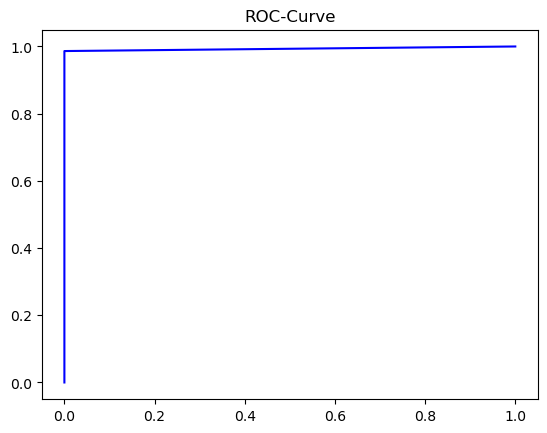

In [134]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# KNN

In [135]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier(n_neighbors=40)

In [136]:
knn.fit(x_tr,y_tr)

KNeighborsClassifier(n_neighbors=40)

In [137]:
k_p=knn.predict(x_te)

In [138]:
ck=confusion_matrix(k_p,y_te)
ck

array([[81261,  6921],
       [    2,  1816]], dtype=int64)

In [139]:
k_f1=f1_score(k_p,y_te)
k_f1

0.3441023211747987

In [140]:
k_pe=precision_score(k_p,y_te)
k_pe

0.20785166533134944

In [141]:
k_re=recall_score(k_p,y_te)
k_re

0.9988998899889989

In [142]:
kacc=ck.diagonal().sum()/ck.sum()*100
kacc

92.30777777777777

In [143]:
print(classification_report(k_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.92      0.96     88182
           1       0.21      1.00      0.34      1818

    accuracy                           0.92     90000
   macro avg       0.60      0.96      0.65     90000
weighted avg       0.98      0.92      0.95     90000



# ROC Curve

In [144]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,k_p)

Text(0.5, 1.0, 'ROC-Curve')

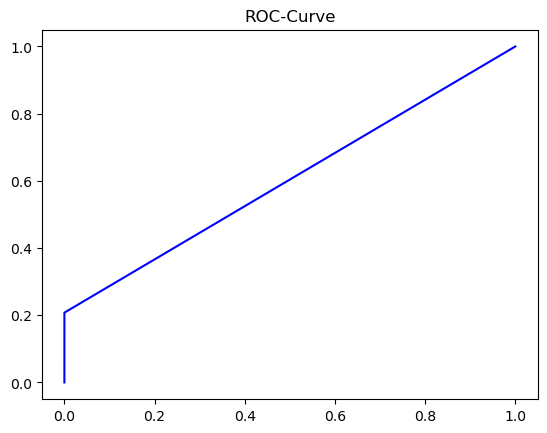

In [145]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Support Vector Machine

In [146]:
from sklearn.svm import SVC
svc=SVC()

In [147]:
svc.fit(x_tr,y_tr)

SVC()

In [148]:
s_p=svc.predict(x_te)
s_p

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [149]:
cs=confusion_matrix(s_p,y_te)
cs

array([[81217,   998],
       [   46,  7739]], dtype=int64)

In [150]:
s_f1=f1_score(s_p,y_te)
s_f1

0.9368115240285679

In [151]:
s_pe=precision_score(s_p,y_te)
s_pe

0.8857731486780359

In [152]:
s_re=recall_score(s_p,y_te)
s_re

0.9940912010276172

In [153]:
acc_s=cs.diagonal().sum()/cs.sum()*100
acc_s

98.83999999999999

In [154]:
print(classification_report(s_p,y_te))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     82215
           1       0.89      0.99      0.94      7785

    accuracy                           0.99     90000
   macro avg       0.94      0.99      0.97     90000
weighted avg       0.99      0.99      0.99     90000



# ROC Curve

In [155]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,s_p)

Text(0.5, 1.0, 'ROC-Curve')

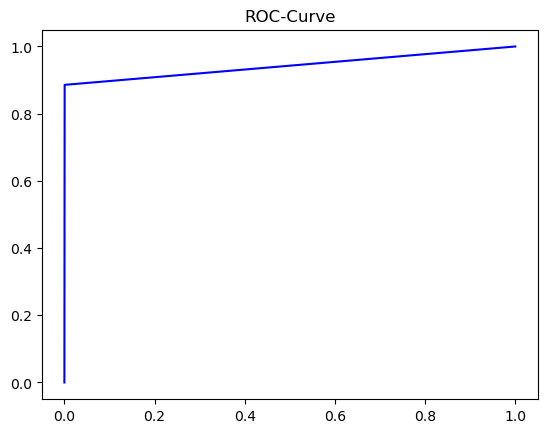

In [156]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# ADA Boost

In [157]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [158]:
adbo1=AdaBoostClassifier(DecisionTreeClassifier(),n_estimators=2)

In [159]:
adbo1.fit(x_tr,y_tr)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [160]:
ad_p1=adbo1.predict(x_te)
ad_p1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [161]:
ad_cf=confusion_matrix(ad_p1,y_te)
ad_cf

array([[81214,    56],
       [   49,  8681]], dtype=int64)

In [162]:
ad_f1=f1_score(ad_p1,y_te)
ad_f1

0.9939886643384669

In [163]:
ad_pe=precision_score(ad_p1,y_te)
ad_pe

0.9935904772805311

In [164]:
ad_re=recall_score(ad_p1,y_te)
ad_re

0.9943871706758305

In [165]:
ad_acc1=ad_cf.diagonal().sum()/ad_cf.sum()*100
ad_acc1

99.88333333333334

In [166]:
print(classification_report(ad_p1,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81270
           1       0.99      0.99      0.99      8730

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# ROC Curve

In [167]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,ad_p1)

Text(0.5, 1.0, 'ROC-Curve')

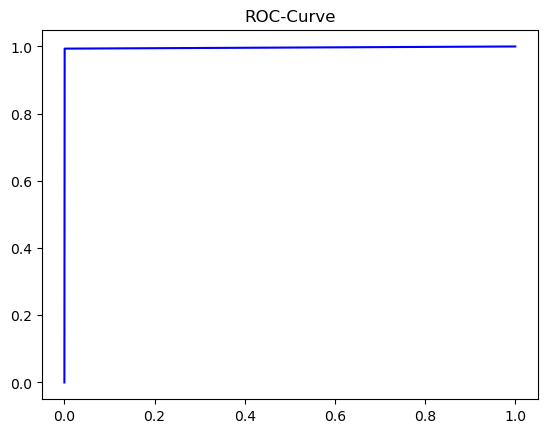

In [168]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# XG Boost

In [169]:
from xgboost import XGBClassifier
xgb1=XGBClassifier()

In [170]:
xgb1.fit(x_tr,y_tr)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [171]:
xgb1_p1=xgb1.predict(x_te)

In [172]:
xgb1_cf=confusion_matrix(xgb1_p1,y_te)
xgb1_cf

array([[81263,    33],
       [    0,  8704]], dtype=int64)

In [173]:
xgb_f1=f1_score(xgb1_p1,y_te)
xgb_f1

0.9981079066567284

In [174]:
xgb_pe=precision_score(xgb1_p1,y_te)
xgb_pe

0.9962229598260273

In [175]:
xgb_re=recall_score(xgb1_p1,y_te)
xgb_re

1.0

In [176]:
xgb1_acc1=xgb1_cf.diagonal().sum()/xgb1_cf.sum()*100
xgb1_acc1

99.96333333333334

In [177]:
print(classification_report(xgb1_p1,y_te))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     81296
           1       1.00      1.00      1.00      8704

    accuracy                           1.00     90000
   macro avg       1.00      1.00      1.00     90000
weighted avg       1.00      1.00      1.00     90000



# ROC Curve

In [178]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,xgb1_p1)

Text(0.5, 1.0, 'ROC-Curve')

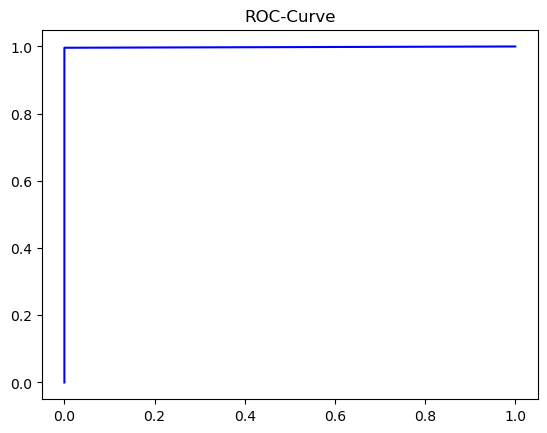

In [179]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Navie Bayes

In [180]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()

In [181]:
nb.fit(x_tr,y_tr)

MultinomialNB()

In [182]:
n_p=nb.predict(x_te)

In [183]:
nc=confusion_matrix(n_p,y_te)
nc

array([[63915,   766],
       [17348,  7971]], dtype=int64)

In [184]:
n_f1=f1_score(n_p,y_te)
n_f1

0.46811134601832266

In [185]:
n_pe=precision_score(n_p,y_te)
n_pe

0.9123268856586929

In [186]:
n_re=recall_score(n_p,y_te)
n_re

0.3148228603025396

In [187]:
n_ac=nc.diagonal().sum()/nc.sum()*100
n_ac

79.87333333333333

In [188]:
print(classification_report(n_p,y_te))

              precision    recall  f1-score   support

           0       0.79      0.99      0.88     64681
           1       0.91      0.31      0.47     25319

    accuracy                           0.80     90000
   macro avg       0.85      0.65      0.67     90000
weighted avg       0.82      0.80      0.76     90000



# ROC Curve

In [189]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(y_te,n_p)

Text(0.5, 1.0, 'ROC-Curve')

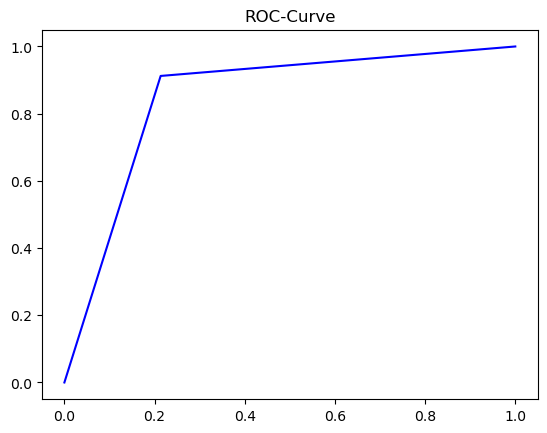

In [190]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Conclusion

In [191]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"]
list2=[acc1,dt_acc1,rf_acc,ad_acc1,xgb1_acc1,acc_s,kacc,n_ac]
list3=[lg_f1,dt_f1,rf_f1,ad_f1,xgb_f1,s_f1,k_f1,n_f1]
list4=[lg_pe,dt_pe,rf_pe,ad_pe,xgb_pe,s_pe,k_pe,n_pe]
list5=[lg_re,dt_re,rf_re,ad_re,xgb_re,s_re,k_re,n_re]

In [192]:
df=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"F1_Score":list3,"Precision_Score":list4,"Recall_Score":list5})
df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,99.582222,0.978117,0.961772,0.995027
1,Decision Tree,99.876667,0.993649,0.993819,0.993478
2,Random Forest,99.867778,0.993143,0.986380,1.000000
3,Ada Boost,99.883333,0.993989,0.993590,0.994387
4,XG Boost,99.963333,0.998108,0.996223,1.000000
5,SVM,98.840000,0.936812,0.885773,0.994091
6,KNN,92.307778,0.344102,0.207852,0.998900
7,Naive Bayes,79.873333,0.468111,0.912327,0.314823


# Class Imabalance

In [194]:
train.default_ind.value_counts()

0    406907
1     43093
Name: default_ind, dtype: int64

In [195]:
c_0,c_1=train["default_ind"].value_counts()
c_0,c_1

(406907, 43093)

In [196]:
train_0=train[train["default_ind"]==0]
train_1=train[train["default_ind"]==1]

In [197]:
train_0.shape,train_1.shape

((406907, 49), (43093, 49))

In [198]:
class_0under=train_0.sample(c_1)

In [199]:
class0_1=pd.concat([class_0under,train_1],axis=0)
class0_1.head(1)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,56000.0,2,59,0,2,16001,804,4,21.45,0.0,593,0.0,10.0,0.0,23181.0,39.0,18.0,1,8890.06,8890.06,13087.83,13087.83,11109.94,1977.89,0.0,0.0,0.0,23,623.23,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0


In [200]:
class0_1.default_ind.value_counts()

0    43093
1    43093
Name: default_ind, dtype: int64

In [201]:
class0_1.shape

(86186, 49)

# Outlier TreatMent

<AxesSubplot:>

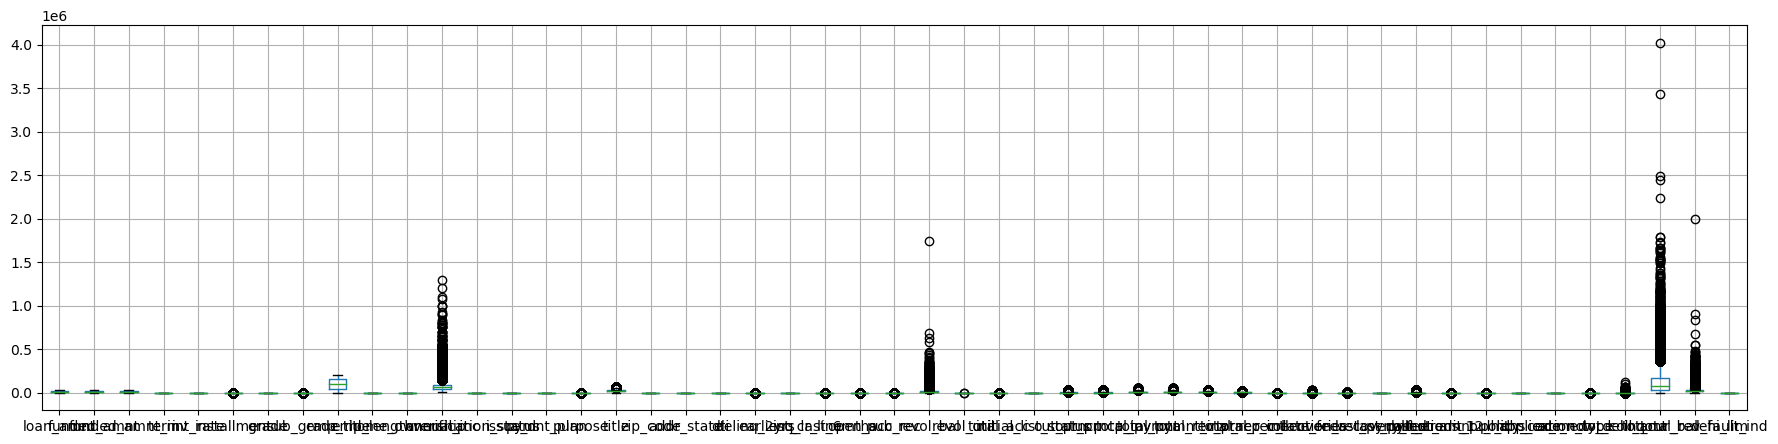

In [202]:
class0_1.boxplot(figsize=(22,5))

# Installment

<AxesSubplot:ylabel='installment'>

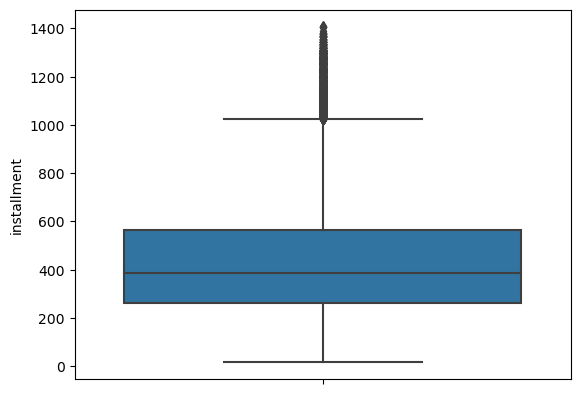

In [203]:
sns.boxplot(data=class0_1,y="installment")

<AxesSubplot:xlabel='installment', ylabel='Density'>

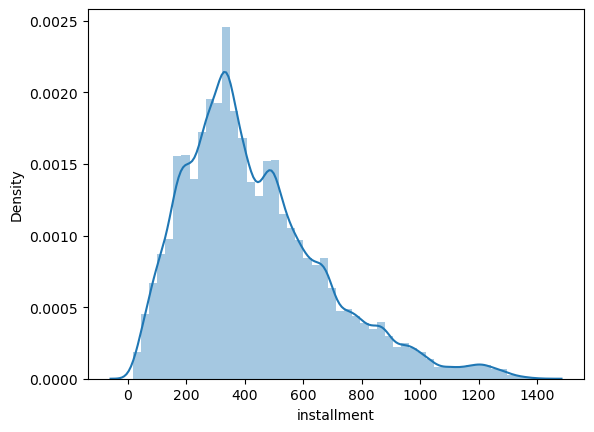

In [204]:
sns.distplot(class0_1.installment)

In [205]:
class0_1.installment.value_counts()

327.34    201
336.90    198
332.72    172
332.10    149
317.54    138
         ... 
287.09      1
709.76      1
961.54      1
503.98      1
388.80      1
Name: installment, Length: 27541, dtype: int64

In [206]:
class0_1.installment.skew()

0.9500580302664183

In [207]:
iqr=class0_1.installment.quantile(0.75)-class0_1.installment.quantile(0.25)
iqr

304.845

In [208]:
lb=class0_1["installment"].quantile(0.25)-(iqr*3)
ub=class0_1["installment"].quantile(0.75)+(iqr*3)
print(lb,ub)

-653.4050000000001 1480.5100000000002


In [209]:
class0_1.loc[class0_1["installment"]>1492.7999999999997,"installment"]=1492.7999999999997

# Title

<AxesSubplot:ylabel='title'>

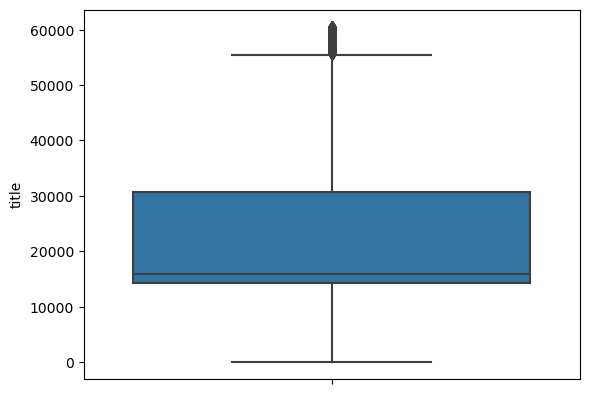

In [210]:
sns.boxplot(data=class0_1,y="title")

In [211]:
class0_1.title.describe()

count    86186.000000
mean     22933.297206
std      14413.945507
min          0.000000
25%      14280.000000
50%      16001.000000
75%      30768.000000
max      60581.000000
Name: title, dtype: float64

<AxesSubplot:xlabel='title', ylabel='Density'>

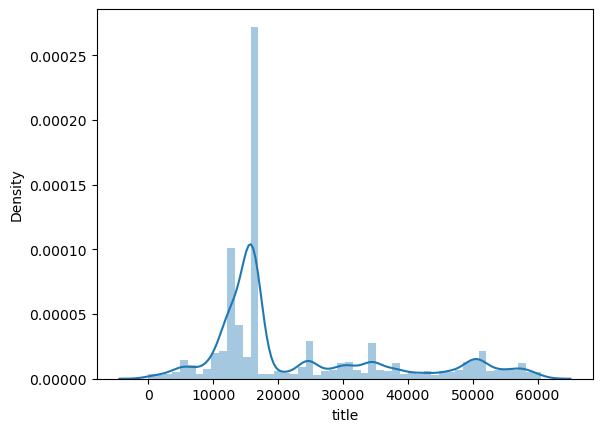

In [212]:
sns.distplot(class0_1.title)

In [213]:
class0_1.title.value_counts()

16001    27553
12597     9453
14280     3300
34394     2382
24694     2332
         ...  
7532         1
33445        1
42635        1
56494        1
44272        1
Name: title, Length: 16607, dtype: int64

In [214]:
class0_1.title.skew()

1.1212551955300105

In [215]:
iqr=class0_1.title.quantile(0.75)-class0_1.title.quantile(0.25)
iqr

16488.0

In [216]:
lb=class0_1["title"].quantile(0.25)-(iqr*3)
ub=class0_1["title"].quantile(0.75)+(iqr*3)
print(lb,ub)

-35184.0 80232.0


In [217]:
class0_1.loc[class0_1["title"]>79643.0,"title"]=79643.0

# Revol_util

<AxesSubplot:ylabel='revol_util'>

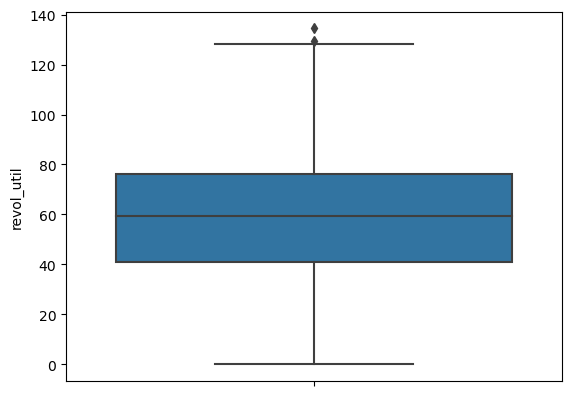

In [218]:
sns.boxplot(data=class0_1,y="revol_util")

<AxesSubplot:xlabel='revol_util', ylabel='Density'>

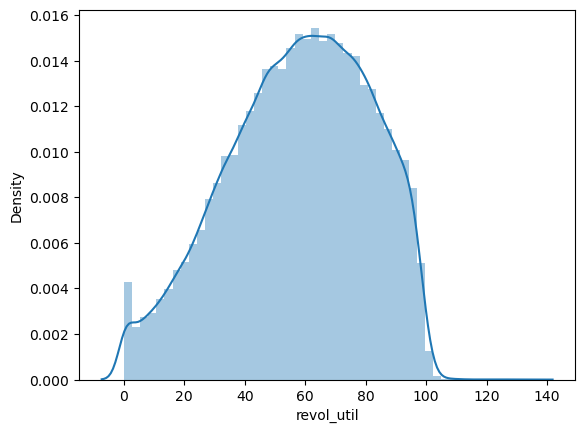

In [219]:
sns.distplot(class0_1.revol_util)

In [220]:
class0_1.revol_util.value_counts()

0.00      436
57.50     190
70.10     171
61.30     163
76.00     158
         ... 
17.71       1
0.12        1
8.46        1
32.04       1
104.20      1
Name: revol_util, Length: 1084, dtype: int64

In [221]:
class0_1.revol_util.skew()

-0.31907412908893373

(array([3.6670e+03, 6.1340e+03, 1.0993e+04, 1.5169e+04, 1.7391e+04,
        1.6555e+04, 1.2788e+04, 3.4690e+03, 1.4000e+01, 6.0000e+00]),
 array([  0.  ,  13.45,  26.9 ,  40.35,  53.8 ,  67.25,  80.7 ,  94.15,
        107.6 , 121.05, 134.5 ]),
 <BarContainer object of 10 artists>)

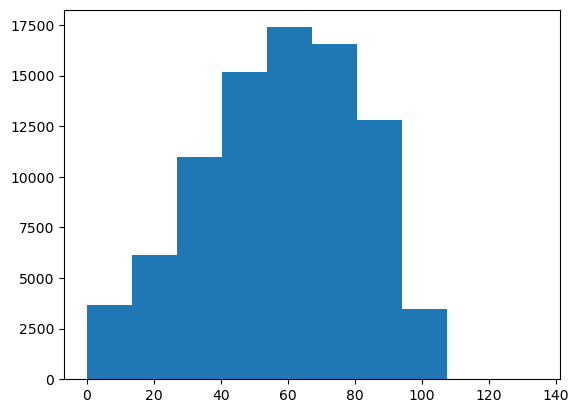

In [222]:
plt.hist(class0_1.revol_util)

In [223]:
upperboundry=class0_1["revol_util"].mean()+3*class0_1["revol_util"].std()
lowerboundry=class0_1["revol_util"].mean()-3*class0_1["revol_util"].std()
print(upperboundry,lowerboundry)

128.3004454493501 -12.99519308817888


In [224]:
class0_1.loc[class0_1["revol_util"]>128.41454686059296,"revol_util"]=128.41454686059296

# Total_acc

<AxesSubplot:ylabel='total_acc'>

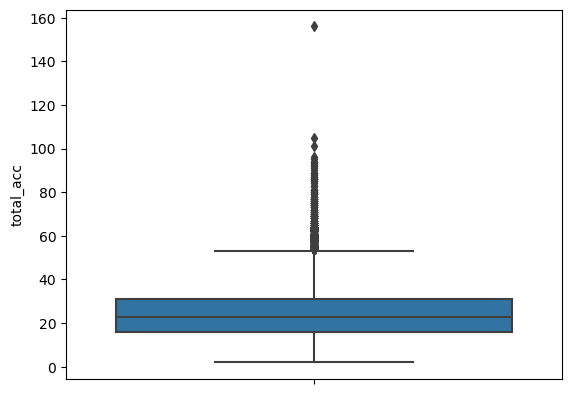

In [225]:
sns.boxplot(data=class0_1,y="total_acc")

<AxesSubplot:xlabel='total_acc', ylabel='Density'>

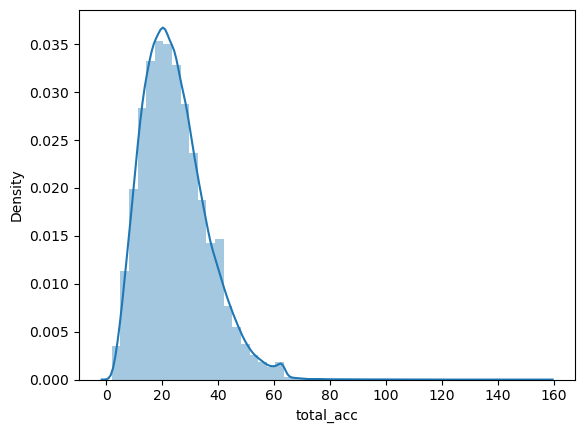

In [226]:
sns.distplot(class0_1.total_acc)

In [227]:
class0_1.total_acc.value_counts()

21.0    3224
20.0    3195
19.0    3148
17.0    3096
22.0    3086
        ... 
88.0       1
84.0       1
96.0       1
90.0       1
95.0       1
Name: total_acc, Length: 97, dtype: int64

In [228]:
class0_1.total_acc.skew()

0.8229293521739155

In [229]:
iqr=class0_1.total_acc.quantile(0.75)-class0_1.total_acc.quantile(0.25)
iqr

15.0

In [230]:
lb=class0_1["total_acc"].quantile(0.25)-(iqr*3)
ub=class0_1["total_acc"].quantile(0.75)+(iqr*3)
print(lb,ub)

-29.0 76.0


In [231]:
class0_1.loc[class0_1["total_acc"]>76.0,"total_acc"]=76.0

# total_pymnt

<AxesSubplot:ylabel='total_pymnt'>

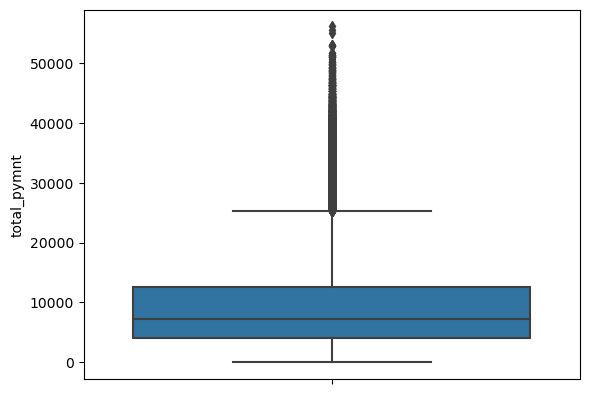

In [232]:
sns.boxplot(data=class0_1,y="total_pymnt")

<AxesSubplot:xlabel='total_pymnt', ylabel='Density'>

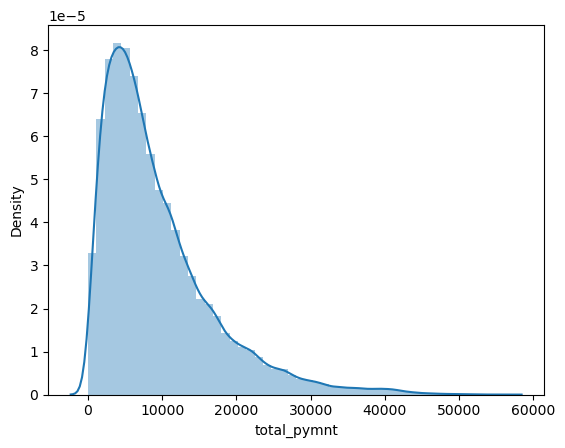

In [233]:
sns.distplot(class0_1.total_pymnt)

In [234]:
class0_1.total_pymnt.value_counts()

0.00        82
5892.12     16
6546.80     13
6743.73     11
2021.40     11
            ..
12580.95     1
10197.30     1
3090.02      1
9950.75      1
2477.89      1
Name: total_pymnt, Length: 79466, dtype: int64

In [235]:
iqr=class0_1.total_pymnt.quantile(0.75)-class0_1.total_pymnt.quantile(0.25)
iqr

8502.500116025

In [236]:
class0_1.total_pymnt.skew()

1.6192629335835202

In [237]:
lb=class0_1["total_pymnt"].quantile(0.25)-(iqr*3)
ub=class0_1["total_pymnt"].quantile(0.75)+(iqr*3)
print(lb,ub)

-21483.057848074997 38034.4429641


In [238]:
class0_1.loc[class0_1["total_pymnt"]>38111.4225,"total_pymnt"]=38111.4225 

# total_pymnt_inv

<AxesSubplot:ylabel='total_pymnt_inv'>

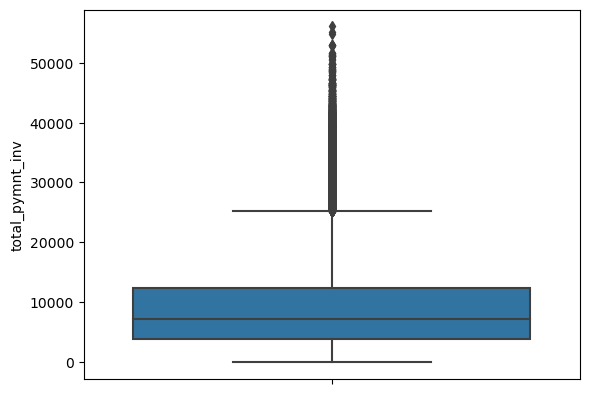

In [239]:
sns.boxplot(data=class0_1,y="total_pymnt_inv")

<AxesSubplot:xlabel='total_pymnt_inv', ylabel='Density'>

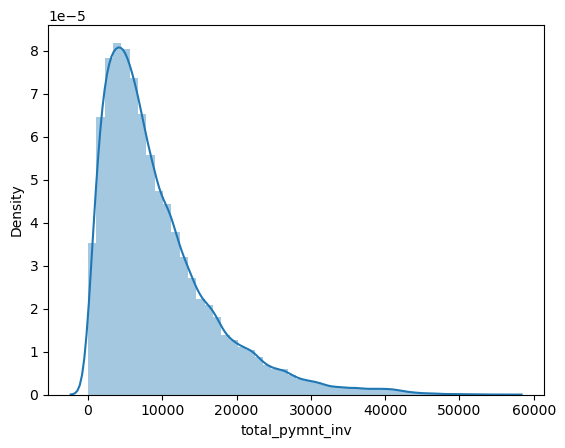

In [240]:
sns.distplot(class0_1.total_pymnt_inv)

In [241]:
class0_1.total_pymnt_inv.value_counts()

0.00        142
5892.12      15
2021.40      11
6743.73      11
5619.69      10
           ... 
8711.58       1
4435.60       1
10707.65      1
8082.69       1
2477.89       1
Name: total_pymnt_inv, Length: 79667, dtype: int64

In [242]:
iqr=class0_1.total_pymnt_inv.quantile(0.75)-class0_1.total_pymnt_inv.quantile(0.25)
iqr

8494.3825

In [243]:
lb=class0_1["total_pymnt_inv"].quantile(0.25)-(iqr*3)
ub=class0_1["total_pymnt_inv"].quantile(0.75)+(iqr*3)
print(lb,ub)

-21509.372499999998 37951.305


In [244]:
class0_1.loc[class0_1["total_pymnt_inv"]>37991.97,"total_pymnt_inv"]=37991.97

# Total_rec_prncp

<AxesSubplot:ylabel='total_rec_prncp'>

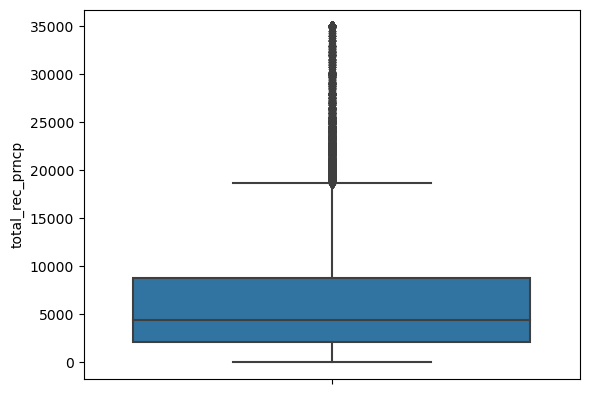

In [245]:
sns.boxplot(data=class0_1,y="total_rec_prncp")

<AxesSubplot:xlabel='total_rec_prncp', ylabel='Density'>

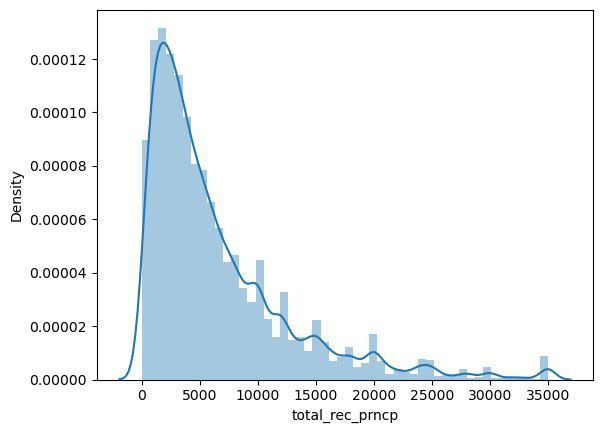

In [246]:
sns.distplot(class0_1.total_rec_prncp)

In [247]:
class0_1.total_rec_prncp.value_counts()

10000.00    1414
12000.00    1083
15000.00     893
20000.00     781
6000.00      720
            ... 
4979.05        1
7170.34        1
3963.85        1
17917.52       1
1709.70        1
Name: total_rec_prncp, Length: 59727, dtype: int64

In [248]:
class0_1.total_rec_prncp.skew()

1.8559218566198632

In [249]:
iqr=class0_1.total_rec_prncp.quantile(0.75)-class0_1.total_rec_prncp.quantile(0.25)
iqr

6598.2175

In [250]:
lb=class0_1["total_rec_prncp"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rec_prncp"].quantile(0.75)+(iqr*3)
print(lb,ub)

-17645.7275 28541.795


In [251]:
class0_1.loc[class0_1["total_rec_prncp"]>28492.3675,"total_rec_prncp"]=28492.3675

# Total_rec_int

<AxesSubplot:ylabel='total_rec_int'>

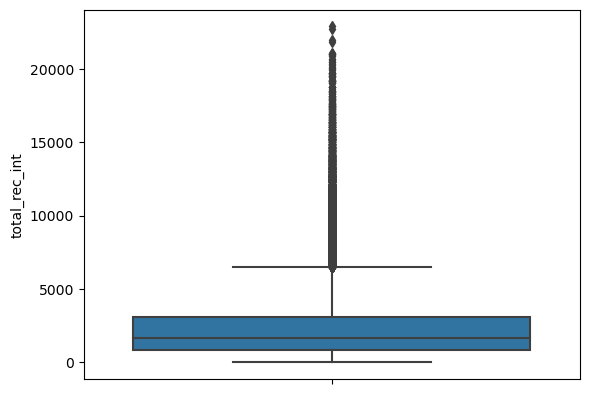

In [252]:
sns.boxplot(data=class0_1,y="total_rec_int")

<AxesSubplot:xlabel='total_rec_int', ylabel='Density'>

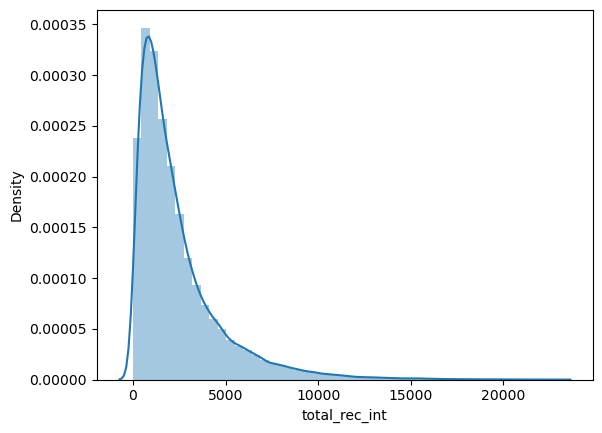

In [253]:
sns.distplot(class0_1.total_rec_int)

In [254]:
class0_1.total_rec_int.value_counts()

0.00        363
1301.45      13
1397.98      12
1350.99      12
2963.32      11
           ... 
965.28        1
13580.53      1
504.44        1
7363.02       1
523.88        1
Name: total_rec_int, Length: 74518, dtype: int64

In [255]:
iqr=class0_1.total_rec_int.quantile(0.75)-class0_1.total_rec_int.quantile(0.25)
iqr

2251.0274999999997

In [256]:
lb=class0_1["total_rec_int"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rec_int"].quantile(0.75)+(iqr*3)
print(lb,ub)

-5888.222499999999 9868.969999999998


In [257]:
class0_1.loc[class0_1["total_rec_int"]>9886.109999999999,"total_rec_int"]=9886.109999999999

# Tot_cur_bal

<AxesSubplot:ylabel='tot_cur_bal'>

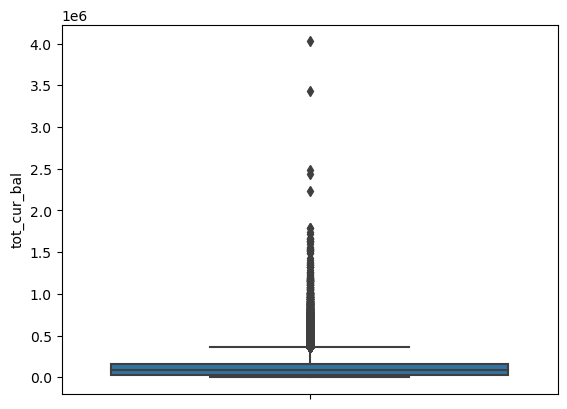

In [258]:
sns.boxplot(data=class0_1,y="tot_cur_bal")

<AxesSubplot:xlabel='tot_cur_bal', ylabel='Density'>

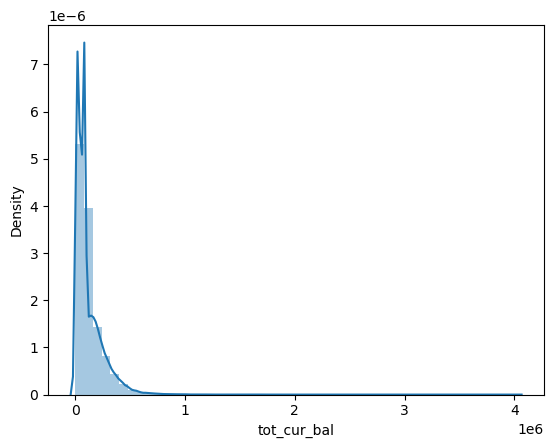

In [259]:
sns.distplot(class0_1.tot_cur_bal)

In [260]:
class0_1.tot_cur_bal.value_counts()

82071.0     16055
0.0            21
14791.0         6
17857.0         6
31499.0         6
            ...  
230332.0        1
254285.0        1
127871.0        1
95645.0         1
75416.0         1
Name: tot_cur_bal, Length: 59881, dtype: int64

In [261]:
class0_1.tot_cur_bal.skew()

3.2245995386477455

In [262]:
iqr=class0_1.tot_cur_bal.quantile(0.75)-class0_1.tot_cur_bal.quantile(0.25)
iqr

130621.25

In [263]:
lb=class0_1["tot_cur_bal"].quantile(0.25)-(iqr*3)
ub=class0_1["tot_cur_bal"].quantile(0.75)+(iqr*3)
print(lb,ub)

-358884.5 555464.25


In [264]:
class0_1.loc[class0_1["tot_cur_bal"]>558303.5,"tot_cur_bal"]=558303.5

# Annual_inc

<AxesSubplot:ylabel='annual_inc'>

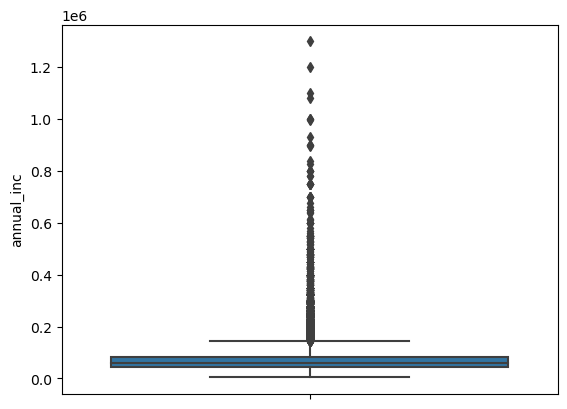

In [265]:
sns.boxplot(data=class0_1,y="annual_inc")

In [266]:
class0_1.annual_inc.describe()

count    8.618600e+04
mean     6.926144e+04
std      4.428051e+04
min      4.000000e+03
25%      4.300000e+04
50%      6.000000e+04
75%      8.400000e+04
max      1.300000e+06
Name: annual_inc, dtype: float64

<AxesSubplot:xlabel='annual_inc', ylabel='Density'>

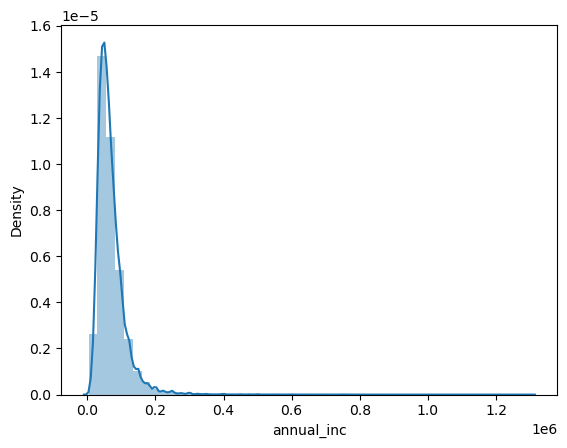

In [267]:
sns.distplot(class0_1.annual_inc)

In [268]:
class0_1.annual_inc.value_counts()

60000.0     3565
50000.0     3063
40000.0     2674
65000.0     2522
45000.0     2349
            ... 
131004.0       1
37983.4        1
32920.0        1
35850.0        1
35075.0        1
Name: annual_inc, Length: 8468, dtype: int64

In [269]:
iqr=class0_1.annual_inc.quantile(0.75)-class0_1.annual_inc.quantile(0.25)
iqr

41000.0

In [270]:
lb=class0_1["annual_inc"].quantile(0.25)-(iqr*3)
ub=class0_1["annual_inc"].quantile(0.75)+(iqr*3)
print(lb,ub)

-80000.0 207000.0


In [271]:
class0_1.loc[class0_1["annual_inc"]>207000.0,"annual_inc"]=207000.0

# Last_pymnt_amnt

<AxesSubplot:ylabel='last_pymnt_amnt'>

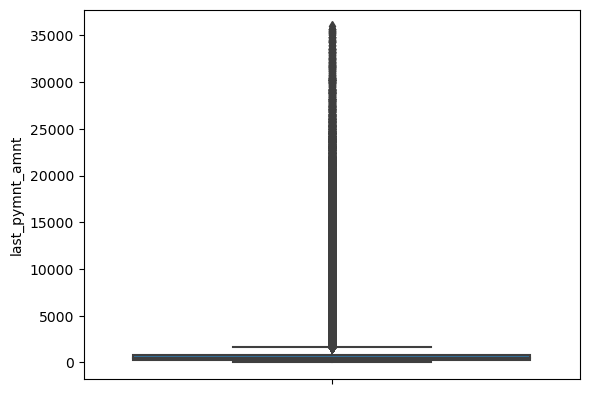

In [272]:
sns.boxplot(data=class0_1 ,y="last_pymnt_amnt")

In [273]:
class0_1.last_pymnt_amnt.describe()

count    86186.000000
mean      1949.061081
std       4370.381744
min          0.000000
25%        275.720000
50%        452.890000
75%        802.650000
max      35967.610000
Name: last_pymnt_amnt, dtype: float64

<AxesSubplot:xlabel='last_pymnt_amnt', ylabel='Density'>

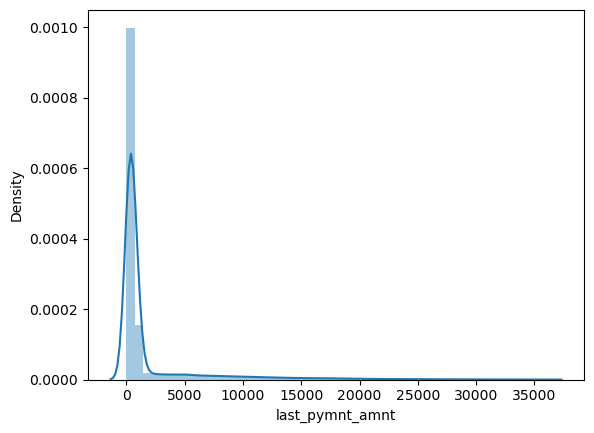

In [274]:
sns.distplot(class0_1.last_pymnt_amnt)

In [275]:
class0_1.last_pymnt_amnt.value_counts()

0.00        364
100.00      200
200.00      167
327.34      154
336.90      152
           ... 
9855.71       1
285.47        1
14753.20      1
16924.07      1
908.22        1
Name: last_pymnt_amnt, Length: 43940, dtype: int64

In [276]:
iqr=class0_1.last_pymnt_amnt.quantile(0.75)-class0_1.last_pymnt_amnt.quantile(0.25)
iqr

526.93

In [277]:
lb=class0_1["last_pymnt_amnt"].quantile(0.25)-(iqr*3)
ub=class0_1["last_pymnt_amnt"].quantile(0.75)+(iqr*3)
print(lb,ub)

-1305.07 2383.44


In [278]:
class0_1.loc[class0_1["last_pymnt_amnt"]>2422.4750000000004,"last_pymnt_amnt"]=2422.4750000000004

# Total_rev_hi_lim

<AxesSubplot:ylabel='total_rev_hi_lim'>

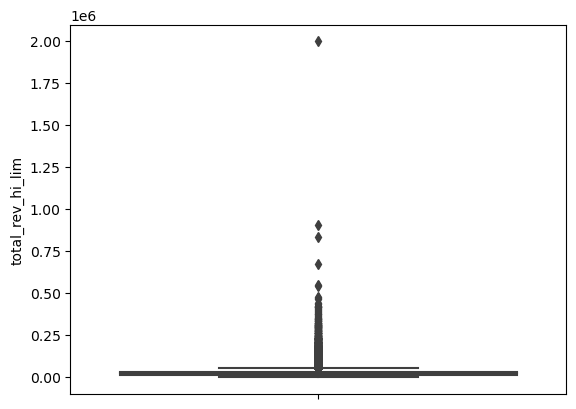

In [279]:
sns.boxplot(data=class0_1,y="total_rev_hi_lim")

In [280]:
class0_1.total_rev_hi_lim.describe()

count    8.618600e+04
mean     2.753317e+04
std      2.493002e+04
min      0.000000e+00
25%      1.490000e+04
50%      2.290000e+04
75%      3.160000e+04
max      1.998700e+06
Name: total_rev_hi_lim, dtype: float64

<AxesSubplot:xlabel='total_rev_hi_lim', ylabel='Density'>

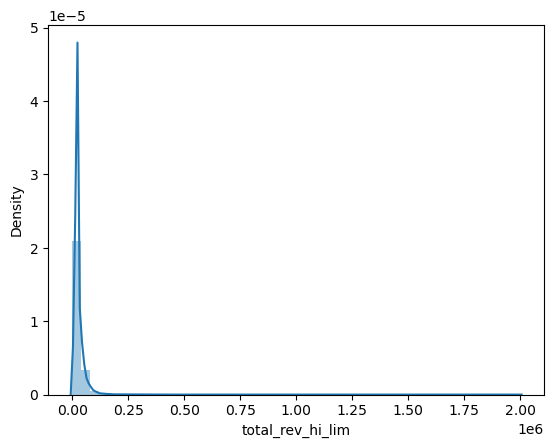

In [281]:
sns.distplot(class0_1.total_rev_hi_lim)

In [282]:
class0_1.total_rev_hi_lim.skew()

10.881347395425207

In [283]:
class0_1.total_rev_hi_lim.value_counts()

22900.0     16192
14000.0       252
15000.0       249
11000.0       243
12000.0       243
            ...  
103287.0        1
79317.0         1
149700.0        1
103400.0        1
19050.0         1
Name: total_rev_hi_lim, Length: 4231, dtype: int64

In [284]:
iqr=class0_1.total_rev_hi_lim.quantile(0.75)-class0_1.total_rev_hi_lim.quantile(0.25)
iqr

16700.0

In [285]:
lb=class0_1["total_rev_hi_lim"].quantile(0.25)-(iqr*3)
ub=class0_1["total_rev_hi_lim"].quantile(0.75)+(iqr*3)
print(lb,ub)

-35200.0 81700.0


In [286]:
class0_1.loc[class0_1["total_rev_hi_lim"]>81800.0,"total_rev_hi_lim"]=81800.0

# Skewness Treatment

In [287]:
class0_1.skew()

loan_amnt                      0.721792
funded_amnt                    0.726978
funded_amnt_inv                0.725441
term                           0.827796
int_rate                       0.211687
installment                    0.950058
grade                          0.488073
sub_grade                      0.488462
emp_title                     -0.023340
emp_length                     0.529487
home_ownership                -0.039594
annual_inc                     1.507224
verification_status           -0.177565
issue_d                       -0.142197
pymnt_plan                     0.000000
purpose                        2.191934
title                          1.121255
zip_code                      -0.002833
addr_state                     0.074701
dti                            0.115100
delinq_2yrs                    5.460908
earliest_cr_line              -0.025587
inq_last_6mths                 1.407749
open_acc                       1.147213
pub_rec                       28.132714


In [288]:
class0_1.loc[class0_1['annual_inc']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind


In [289]:
class0_1.annual_inc=np.log(class0_1.annual_inc)

In [290]:
class0_1.annual_inc.skew()

-0.03559881360699661

In [291]:
class0_1.loc[class0_1['delinq_2yrs']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.0,593,0.0,10.0,0.0,23181.0,39.0,18.0,1,8890.06,8890.06,13087.830000,13087.83,11109.94,1977.89,0.00,0.00,0.0000,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.0,142,0.0,6.0,0.0,12201.0,60.4,21.0,0,0.00,0.00,22246.294226,22218.14,19750.00,2496.29,0.00,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.0,40,1.0,10.0,1.0,8149.0,55.6,21.0,0,2471.19,2471.19,5401.340000,5401.34,2928.81,2472.53,0.00,0.00,0.0000,23,138.570,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.0,204,0.0,4.0,0.0,32428.0,70.2,13.0,0,20424.25,20424.25,29066.280000,29066.28,14575.75,9886.11,0.00,0.00,0.0000,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.0,430,0.0,8.0,0.0,5980.0,99.7,15.0,1,0.00,0.00,15827.200000,15827.20,13775.00,2052.20,0.00,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449864,25975.0,25975.0,25975.0,0,15.61,908.22,2,13,121666,2,1,11.277203,2,36,0,2,13319,838,4,25.22,0.0,94,1.0,20.0,0.0,8147.0,54.0,49.0,0,0.00,0.00,7826.200000,7826.20,2926.38,1614.04,0.00,3285.78,32.8578,55,908.220,82,0.0,1.0,0,0.0,0.0,300135.0,15100.0,1
449888,10000.0,10000.0,10000.0,1,14.98,237.80,2,12,95392,1,1,11.050890,2,36,0,2,16001,221,44,6.27,0.0,41,1.0,10.0,5.0,6318.0,32.6,22.0,0,0.00,0.00,3631.350000,3631.35,1194.92,1182.31,0.00,1254.12,225.7416,79,237.800,6,0.0,1.0,0,0.0,75.0,148322.0,19400.0,1
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.0,310,1.0,20.0,0.0,37712.0,25.5,54.0,0,0.00,0.00,15222.600000,15222.60,5261.88,4505.60,0.00,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.0,597,1.0,22.0,1.0,8522.0,76.1,36.0,0,0.00,0.00,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1


In [292]:
class0_1.delinq_2yrs=np.sqrt(class0_1.delinq_2yrs)

In [293]:
class0_1.delinq_2yrs.skew()

2.2473566120383017

In [294]:
class0_1.loc[class0_1['inq_last_6mths']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.000000,593,0.0,10.0,0.0,23181.0,39.0,18.0,1,8890.06,8890.06,13087.830000,13087.83,11109.94,1977.89,0.0,0.00,0.0000,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.0,6.0,0.0,12201.0,60.4,21.0,0,0.00,0.00,22246.294226,22218.14,19750.00,2496.29,0.0,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.000000,204,0.0,4.0,0.0,32428.0,70.2,13.0,0,20424.25,20424.25,29066.280000,29066.28,14575.75,9886.11,0.0,0.00,0.0000,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.0,8.0,0.0,5980.0,99.7,15.0,1,0.00,0.00,15827.200000,15827.20,13775.00,2052.20,0.0,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
289221,7450.0,7450.0,7450.0,0,13.35,252.28,2,11,3875,6,4,10.766378,2,82,0,2,16001,623,18,32.05,0.000000,648,0.0,9.0,0.0,13671.0,37.6,29.0,0,4701.27,4701.27,3784.200000,3784.20,2748.73,1035.47,0.0,0.00,0.0000,40,252.280,41,0.0,1.0,0,0.0,0.0,28361.0,36400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449808,29175.0,29175.0,29125.0,1,20.50,781.10,4,20,5820,1,5,11.149355,2,36,0,2,16001,830,4,29.58,1.414214,529,0.0,8.0,0.0,31880.0,82.8,21.0,0,0.00,0.00,7941.940000,7928.34,1462.48,2442.71,0.0,4036.75,40.3675,55,781.100,82,0.0,1.0,0,0.0,0.0,72062.0,38500.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.000000,594,0.0,11.0,0.0,16206.0,36.7,21.0,0,0.00,0.00,7133.910000,7110.14,3822.63,3311.28,0.0,0.00,0.0000,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1
449827,34475.0,34475.0,34425.0,1,14.98,819.80,2,12,183318,3,1,11.141862,2,36,0,4,54529,278,10,14.59,0.000000,202,0.0,17.0,0.0,2787.0,8.4,28.0,0,0.00,0.00,15134.530000,15112.59,5006.72,4828.53,0.0,5299.28,953.8704,39,819.800,59,0.0,1.0,0,0.0,0.0,259171.0,33000.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.0,6.0,0.0,6685.0,94.2,21.0,0,0.00,0.00,2977.090000,2977.09,1144.68,575.62,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1


In [295]:
class0_1.inq_last_6mths=np.sqrt(class0_1.inq_last_6mths)

In [296]:
class0_1.inq_last_6mths.skew()

0.33124339666997477

In [297]:
class0_1.loc[class0_1['pub_rec']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.0,593,0.0,10.0,0.0,23181.0,39.0,18.0,1,8890.06,8890.06,13087.830000,13087.83,11109.94,1977.89,0.0,0.00,0.0000,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.0,142,0.0,6.0,0.0,12201.0,60.4,21.0,0,0.00,0.00,22246.294226,22218.14,19750.00,2496.29,0.0,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.0,204,0.0,4.0,0.0,32428.0,70.2,13.0,0,20424.25,20424.25,29066.280000,29066.28,14575.75,9886.11,0.0,0.00,0.0000,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.0,430,0.0,8.0,0.0,5980.0,99.7,15.0,1,0.00,0.00,15827.200000,15827.20,13775.00,2052.20,0.0,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
289221,7450.0,7450.0,7450.0,0,13.35,252.28,2,11,3875,6,4,10.766378,2,82,0,2,16001,623,18,32.05,0.0,648,0.0,9.0,0.0,13671.0,37.6,29.0,0,4701.27,4701.27,3784.200000,3784.20,2748.73,1035.47,0.0,0.00,0.0000,40,252.280,41,0.0,1.0,0,0.0,0.0,28361.0,36400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449864,25975.0,25975.0,25975.0,0,15.61,908.22,2,13,121666,2,1,11.277203,2,36,0,2,13319,838,4,25.22,0.0,94,1.0,20.0,0.0,8147.0,54.0,49.0,0,0.00,0.00,7826.200000,7826.20,2926.38,1614.04,0.0,3285.78,32.8578,55,908.220,82,0.0,1.0,0,0.0,0.0,300135.0,15100.0,1
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.0,310,1.0,20.0,0.0,37712.0,25.5,54.0,0,0.00,0.00,15222.600000,15222.60,5261.88,4505.60,0.0,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.0,596,0.0,6.0,0.0,6685.0,94.2,21.0,0,0.00,0.00,2977.090000,2977.09,1144.68,575.62,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.0,319,0.0,11.0,0.0,15317.0,75.5,32.0,0,0.00,0.00,3894.000000,3894.00,1614.75,918.05,0.0,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1


In [298]:
class0_1.pub_rec=np.sqrt(class0_1.pub_rec)

In [299]:
class0_1.pub_rec.skew()

2.682214617766087

In [300]:
class0_1.loc[class0_1['revol_bal']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
448557,5675.0,5675.0,5675.0,0,25.57,227.36,5,29,51984,0,5,10.915088,2,36,0,9,37791,402,34,0.00,0.000000,540,1.000000,1.0,0.0,0.0,0.00,3.0,0,2384.91,2384.91,5456.51,5456.51,3290.09,2166.42,0.0,0.00,0.0000,40,227.360,41,0.0,1.0,0,0.0,0.0,0.0,3600.0,0
14785,4200.0,4200.0,4200.0,0,14.79,145.17,2,13,60837,1,5,10.341613,0,63,0,9,57792,841,4,21.87,1.414214,259,1.000000,3.0,0.0,0.0,2.64,14.0,0,0.00,0.00,5130.54,5130.54,4200.00,930.54,0.0,0.00,0.0000,46,1509.620,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
18179,1825.0,1825.0,1825.0,0,12.68,61.22,2,10,5820,10,5,9.862666,0,56,0,6,8269,826,4,16.81,0.000000,547,0.000000,7.0,0.0,0.0,57.50,11.0,0,0.00,0.00,1930.49,1930.49,1825.00,105.49,0.0,0.00,0.0000,69,223.800,73,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
39315,8000.0,8000.0,775.0,0,10.14,258.67,1,8,138448,3,5,10.819778,0,30,0,9,23467,193,20,8.78,0.000000,424,0.000000,2.0,0.0,0.0,0.00,8.0,0,0.00,0.00,9251.63,895.76,8000.00,1251.63,0.0,0.00,0.0000,10,8.070,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
265490,18000.0,18000.0,18000.0,0,6.49,551.61,0,1,43207,2,1,11.711776,0,82,0,4,24694,839,4,17.01,0.000000,486,0.000000,10.0,0.0,0.0,0.00,56.0,1,0.00,0.00,18287.18,18287.18,18000.00,287.18,0.0,0.00,0.0000,39,2422.475,40,0.0,1.0,0,0.0,0.0,530988.0,48500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
415577,9400.0,9400.0,9400.0,0,18.92,344.19,3,18,198619,3,4,11.440355,2,59,0,1,12597,73,30,0.52,1.000000,479,1.000000,0.0,0.0,0.0,57.50,6.0,0,0.00,0.00,3871.64,3871.64,1657.17,1096.35,0.0,1118.12,201.2616,79,344.190,6,0.0,1.0,0,0.0,0.0,0.0,0.0,1
427245,8125.0,8125.0,8125.0,0,24.08,319.11,5,26,186038,1,4,10.463103,2,29,0,2,16001,587,24,0.00,0.000000,659,1.414214,2.0,0.0,0.0,0.00,5.0,1,0.00,0.00,2319.11,2319.11,2156.07,163.04,0.0,0.00,0.0000,63,2319.110,66,0.0,1.0,0,0.0,0.0,0.0,5000.0,1
431705,24450.0,24450.0,24450.0,1,24.50,710.50,5,27,106411,5,5,10.929332,2,29,0,7,30458,279,10,23.61,0.000000,95,0.000000,18.0,0.0,0.0,0.00,29.0,0,0.00,0.00,3544.78,3544.78,0.00,0.00,0.0,3544.78,35.4478,24,0.000,49,0.0,1.0,0,0.0,0.0,36583.0,81800.0,1
435552,2000.0,2000.0,2000.0,0,16.99,71.30,3,15,21640,6,1,11.156251,2,29,0,9,34394,649,35,8.90,1.414214,33,0.000000,9.0,0.0,0.0,0.00,27.0,1,0.00,0.00,499.10,499.10,313.97,185.13,0.0,0.00,0.0000,95,71.300,32,0.0,1.0,0,0.0,0.0,205862.0,6500.0,1


In [301]:
class0_1.revol_bal=np.sqrt(class0_1.revol_bal)

In [302]:
class0_1.revol_bal.skew()

1.5813942554031974

In [303]:
class0_1.loc[class0_1['out_prncp']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.000000,6.0,0.0,110.458137,60.4,21.0,0,0.0,0.0,22246.294226,22218.14,19750.00,2496.29,0.00,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.000000,8.0,0.0,77.330460,99.7,15.0,1,0.0,0.0,15827.200000,15827.20,13775.00,2052.20,0.00,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
117968,25000.0,25000.0,25000.0,0,18.25,906.95,3,16,86450,1,5,11.350407,2,43,0,2,43168,85,33,15.90,1.000000,30,0.000000,10.0,0.0,86.110394,79.7,14.0,1,0.0,0.0,30986.750000,30986.75,25000.00,5986.75,0.00,0.00,0.0000,64,2422.475,41,0.0,1.0,0,0.0,0.0,32059.0,9300.0,0
240559,6000.0,6000.0,6000.0,0,10.49,194.99,1,7,47567,1,5,11.002100,2,74,0,2,16001,838,4,1.90,0.000000,653,1.732051,16.0,1.0,34.985711,5.1,39.0,0,0.0,0.0,6201.950000,6201.95,6000.00,201.95,0.00,0.00,0.0000,64,2422.475,50,0.0,1.0,0,0.0,0.0,1224.0,24100.0,0
335157,10000.0,10000.0,10000.0,0,10.15,323.38,1,6,77709,3,5,10.915088,0,44,0,1,12597,749,3,4.39,0.000000,156,1.000000,6.0,0.0,94.101010,34.3,8.0,1,0.0,0.0,10646.330000,10646.33,10000.00,646.33,0.00,0.00,0.0000,64,2422.475,67,0.0,1.0,0,0.0,0.0,8855.0,25800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.0,0.0,2977.090000,2977.09,1144.68,575.62,0.00,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.0,0.0,3894.000000,3894.00,1614.75,918.05,0.00,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.0,0.0,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.0,0.0,2481.550000,2481.55,1291.70,523.88,0.00,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [304]:
class0_1.out_prncp=np.sqrt(class0_1.out_prncp)

In [305]:
class0_1.out_prncp.skew()

1.5386648976371233

In [306]:
class0_1.loc[class0_1['out_prncp_inv']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.000000,6.0,0.0,110.458137,60.4,21.0,0,0.0,0.0,22246.294226,22218.14,19750.00,2496.29,0.00,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.000000,8.0,0.0,77.330460,99.7,15.0,1,0.0,0.0,15827.200000,15827.20,13775.00,2052.20,0.00,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
117968,25000.0,25000.0,25000.0,0,18.25,906.95,3,16,86450,1,5,11.350407,2,43,0,2,43168,85,33,15.90,1.000000,30,0.000000,10.0,0.0,86.110394,79.7,14.0,1,0.0,0.0,30986.750000,30986.75,25000.00,5986.75,0.00,0.00,0.0000,64,2422.475,41,0.0,1.0,0,0.0,0.0,32059.0,9300.0,0
240559,6000.0,6000.0,6000.0,0,10.49,194.99,1,7,47567,1,5,11.002100,2,74,0,2,16001,838,4,1.90,0.000000,653,1.732051,16.0,1.0,34.985711,5.1,39.0,0,0.0,0.0,6201.950000,6201.95,6000.00,201.95,0.00,0.00,0.0000,64,2422.475,50,0.0,1.0,0,0.0,0.0,1224.0,24100.0,0
335157,10000.0,10000.0,10000.0,0,10.15,323.38,1,6,77709,3,5,10.915088,0,44,0,1,12597,749,3,4.39,0.000000,156,1.000000,6.0,0.0,94.101010,34.3,8.0,1,0.0,0.0,10646.330000,10646.33,10000.00,646.33,0.00,0.00,0.0000,64,2422.475,67,0.0,1.0,0,0.0,0.0,8855.0,25800.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.000000,6.0,0.0,81.761849,94.2,21.0,0,0.0,0.0,2977.090000,2977.09,1144.68,575.62,0.00,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.000000,11.0,0.0,123.761868,75.5,32.0,0,0.0,0.0,3894.000000,3894.00,1614.75,918.05,0.00,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.000000,22.0,1.0,92.314679,76.1,36.0,0,0.0,0.0,5249.430000,5249.43,2698.16,1414.67,15.82,1120.78,201.7404,31,648.580,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.000000,9.0,1.0,87.692645,53.8,31.0,0,0.0,0.0,2481.550000,2481.55,1291.70,523.88,0.00,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [307]:
class0_1.out_prncp_inv=np.sqrt(class0_1.out_prncp_inv)

In [308]:
class0_1.out_prncp_inv.skew()

1.538753991118821

In [309]:
class0_1.loc[class0_1['total_pymnt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.0,7.0,0.000000,76.628976,57.6,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.0,10.0,0.000000,181.535121,85.8,31.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.0,13.0,0.000000,67.416615,18.6,17.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
6958,2200.0,2200.0,2200.0,1,19.42,57.58,4,22,9385,10,5,11.050890,1,87,0,2,20459,791,4,11.90,0.0,94,1.0,8.0,1.000000,44.877611,83.9,11.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
8696,35000.0,35000.0,34975.0,1,13.99,814.21,2,12,7095,4,1,11.156251,2,87,0,11,42633,688,42,17.73,0.0,421,2.0,6.0,0.000000,119.532422,34.8,16.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410149,11950.0,11950.0,11950.0,0,13.65,406.40,2,10,171306,9,4,11.184421,0,59,0,1,12597,345,41,20.97,0.0,544,1.0,14.0,0.000000,131.483839,87.8,29.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,142679.0,19700.0,1
422052,20475.0,20475.0,20425.0,0,18.92,749.71,3,18,5820,3,5,11.018809,2,59,0,2,16001,346,41,28.74,0.0,546,0.0,9.0,0.000000,127.314571,80.6,19.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,58348.0,20100.0,1
431991,8800.0,8800.0,8800.0,0,18.25,319.25,3,17,129987,9,1,11.238489,2,29,0,2,16001,842,4,26.70,1.0,149,0.0,9.0,1.414214,118.692881,71.5,18.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,290564.0,19700.0,1
436854,10975.0,10975.0,10975.0,0,14.98,380.35,2,12,54750,5,4,11.225243,2,36,0,2,16001,830,4,34.34,0.0,480,1.0,14.0,0.000000,240.037497,53.5,35.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24,0.0,41,0.0,1.0,0,0.0,0.0,454622.0,81800.0,1


In [310]:
class0_1.total_pymnt=np.sqrt(class0_1.total_pymnt)

In [311]:
class0_1.total_pymnt.skew()

0.5228689148606814

In [312]:
class0_1.loc[class0_1['total_pymnt_inv']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
38464,3000.0,1200.0,0.0,0,9.70,38.56,1,5,87640,0,5,9.798571,0,8,0,13,46578,114,33,7.13,0.0,485,1.0,11.0,0.000000,43.646306,27.2,17.0,0,0.0,0.0,35.037979,0.0,1200.00,27.66,0.0,0.0,0.0,25,102.620,26,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38481,9000.0,4450.0,0.0,0,12.22,148.28,2,13,70306,3,1,11.835009,0,8,0,2,8945,773,31,19.00,1.0,141,1.0,12.0,0.000000,166.093347,74.8,40.0,0,0.0,0.0,72.371058,0.0,4450.00,787.57,0.0,0.0,0.0,91,1471.970,57,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38564,2000.0,2000.0,0.0,0,11.97,66.40,2,13,198314,8,1,10.778956,0,38,0,8,55598,59,30,10.40,0.0,147,1.0,7.0,0.000000,129.406337,69.2,16.0,0,0.0,0.0,49.438851,0.0,1999.99,444.21,0.0,0.0,0.0,93,53.810,40,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38653,6600.0,6600.0,0.0,0,11.97,219.12,2,13,170390,2,5,10.896739,0,60,0,1,35880,806,4,18.76,1.0,94,1.0,8.0,0.000000,150.588844,86.3,12.0,0,0.0,0.0,85.627974,0.0,6600.00,732.15,0.0,0.0,0.0,50,2422.475,53,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
38403,6400.0,4500.0,0.0,0,8.32,141.68,0,3,168125,10,4,10.596635,0,84,0,2,14280,87,33,13.02,0.0,365,0.0,6.0,0.000000,110.376628,45.1,24.0,0,0.0,0.0,70.809816,0.0,4500.00,514.03,0.0,0.0,0.0,10,1897.300,10,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
410149,11950.0,11950.0,11950.0,0,13.65,406.40,2,10,171306,9,4,11.184421,0,59,0,1,12597,345,41,20.97,0.0,544,1.0,14.0,0.000000,131.483839,87.8,29.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,142679.0,19700.0,1
422052,20475.0,20475.0,20425.0,0,18.92,749.71,3,18,5820,3,5,11.018809,2,59,0,2,16001,346,41,28.74,0.0,546,0.0,9.0,0.000000,127.314571,80.6,19.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,58348.0,20100.0,1
431991,8800.0,8800.0,8800.0,0,18.25,319.25,3,17,129987,9,1,11.238489,2,29,0,2,16001,842,4,26.70,1.0,149,0.0,9.0,1.414214,118.692881,71.5,18.0,1,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,290564.0,19700.0,1
436854,10975.0,10975.0,10975.0,0,14.98,380.35,2,12,54750,5,4,11.225243,2,36,0,2,16001,830,4,34.34,0.0,480,1.0,14.0,0.000000,240.037497,53.5,35.0,0,0.0,0.0,0.000000,0.0,0.00,0.00,0.0,0.0,0.0,24,0.000,41,0.0,1.0,0,0.0,0.0,454622.0,81800.0,1


In [313]:
class0_1.shape

(86186, 49)

In [314]:
class0_1.total_pymnt_inv=np.sqrt(class0_1.total_pymnt_inv)

In [315]:
class0_1.total_pymnt_inv.skew()

0.5083424015247805

In [316]:
class0_1.loc[class0_1['total_rec_prncp']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,366.75,66.0150,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,1800.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,1126.56,11.2656,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,271.73,2.7173,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,957.97,9.5797,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,1144.13,11.4413,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [317]:
class0_1.total_rec_prncp=np.sqrt(class0_1.total_rec_prncp)

In [318]:
class0_1.total_rec_prncp.skew()

0.6544241120920661

In [319]:
class0_1.loc[class0_1['total_rec_int']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,366.75,66.0150,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,1800.00,0.0000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,1126.56,11.2656,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,271.73,2.7173,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,957.97,9.5797,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,1144.13,11.4413,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [320]:
class0_1.total_rec_int=np.sqrt(class0_1.total_rec_int)

In [321]:
class0_1.total_rec_int.skew()

0.6771820317590128

In [322]:
class0_1.loc[class0_1['total_rec_late_fee']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.000000,593,0.0,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.0,0.00,0.0000,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.0,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.0,0.00,0.0000,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.000000,40,1.0,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.0,0.00,0.0000,23,138.570,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.000000,204,0.0,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.0,0.00,0.0000,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.0,8.0,0.0,77.330460,99.7,15.0,1,0.000000,0.000000,125.806200,125.806200,117.366946,45.301214,0.0,0.00,0.0000,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.000000,310,1.0,20.0,0.0,194.195778,25.5,54.0,0,0.000000,0.000000,123.379901,123.379901,72.538817,67.123766,0.0,5455.12,981.9216,64,697.740,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.0,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.0,1256.79,12.5679,55,344.070,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.0,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.0,1361.20,13.6120,22,50.000,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.0,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.0,665.97,119.8746,87,201.740,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [323]:
class0_1.total_rec_late_fee=np.sqrt(class0_1.total_rec_late_fee)

In [324]:
class0_1.total_rec_late_fee.skew()

4.93652198437192

In [325]:
class0_1.loc[class0_1['recoveries']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.0,593,0.000000,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.000000,0.0,0.0,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.0,142,0.000000,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.000000,0.0,0.0,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.0,40,1.000000,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.000000,0.0,0.0,23,138.570,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.0,204,0.000000,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.000000,0.0,0.0,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.0,430,0.000000,8.0,0.0,77.330460,99.7,15.0,1,0.000000,0.000000,125.806200,125.806200,117.366946,45.301214,0.000000,0.0,0.0,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449798,17625.0,17625.0,17625.0,0,15.61,616.26,2,13,152182,7,1,11.127263,2,36,0,2,29859,855,36,20.79,0.0,97,0.000000,10.0,1.0,86.619859,95.0,19.0,0,0.000000,0.000000,105.787239,105.787239,85.283703,62.344366,5.550676,0.0,0.0,80,350.000,41,0.0,1.0,0,0.0,0.0,214657.0,7900.0,1
449800,15000.0,15000.0,15000.0,1,17.57,377.41,3,16,177861,8,5,10.596635,2,36,0,2,16001,779,32,14.55,0.0,432,0.000000,9.0,0.0,133.951484,57.7,16.0,0,0.000000,0.000000,43.439038,43.439038,28.501403,32.781397,0.000000,0.0,0.0,55,377.410,41,0.0,1.0,0,0.0,0.0,17943.0,31100.0,1
449818,14000.0,14000.0,14000.0,0,7.90,438.07,0,3,86814,3,1,10.858999,2,36,0,1,14280,430,15,29.84,0.0,316,1.414214,7.0,0.0,82.237461,61.5,18.0,0,0.000000,0.000000,78.310536,78.310536,71.099086,32.824686,0.000000,0.0,0.0,64,438.070,41,0.0,1.0,0,0.0,0.0,180454.0,11000.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.0,594,0.000000,11.0,0.0,127.302789,36.7,21.0,0,0.000000,0.000000,84.462477,84.321646,61.827421,57.543723,0.000000,0.0,0.0,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1


In [326]:
class0_1.recoveries=np.sqrt(class0_1.recoveries)

In [327]:
class0_1.recoveries.skew()

2.0240603549894853

In [328]:
class0_1.loc[class0_1['collection_recovery_fee']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.0,593,0.000000,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.000000,0.0,0.0,23,623.230,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.0,142,0.000000,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.000000,0.0,0.0,7,623.460,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.0,40,1.000000,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.000000,0.0,0.0,23,138.570,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.0,204,0.000000,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.000000,0.0,0.0,23,908.890,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.0,430,0.000000,8.0,0.0,77.330460,99.7,15.0,1,0.000000,0.000000,125.806200,125.806200,117.366946,45.301214,0.000000,0.0,0.0,56,2422.475,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449798,17625.0,17625.0,17625.0,0,15.61,616.26,2,13,152182,7,1,11.127263,2,36,0,2,29859,855,36,20.79,0.0,97,0.000000,10.0,1.0,86.619859,95.0,19.0,0,0.000000,0.000000,105.787239,105.787239,85.283703,62.344366,5.550676,0.0,0.0,80,350.000,41,0.0,1.0,0,0.0,0.0,214657.0,7900.0,1
449800,15000.0,15000.0,15000.0,1,17.57,377.41,3,16,177861,8,5,10.596635,2,36,0,2,16001,779,32,14.55,0.0,432,0.000000,9.0,0.0,133.951484,57.7,16.0,0,0.000000,0.000000,43.439038,43.439038,28.501403,32.781397,0.000000,0.0,0.0,55,377.410,41,0.0,1.0,0,0.0,0.0,17943.0,31100.0,1
449818,14000.0,14000.0,14000.0,0,7.90,438.07,0,3,86814,3,1,10.858999,2,36,0,1,14280,430,15,29.84,0.0,316,1.414214,7.0,0.0,82.237461,61.5,18.0,0,0.000000,0.000000,78.310536,78.310536,71.099086,32.824686,0.000000,0.0,0.0,64,438.070,41,0.0,1.0,0,0.0,0.0,180454.0,11000.0,1
449824,15000.0,15000.0,14950.0,1,14.98,356.70,2,12,177061,1,1,10.645425,1,36,0,2,53382,871,46,17.94,0.0,594,0.000000,11.0,0.0,127.302789,36.7,21.0,0,0.000000,0.000000,84.462477,84.321646,61.827421,57.543723,0.000000,0.0,0.0,96,356.700,41,0.0,1.0,0,0.0,0.0,27609.0,44100.0,1


In [329]:
class0_1.collection_recovery_fee=np.sqrt(class0_1.collection_recovery_fee)

In [330]:
class0_1.collection_recovery_fee.skew()

3.359292675909307

In [331]:
class0_1.loc[class0_1['last_pymnt_amnt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
26,15000.0,15000.0,8725.0,0,14.27,514.64,2,11,188531,9,5,11.002100,0,19,0,2,49478,85,33,15.22,0.0,601,1.000000,7.0,0.0,76.628976,57.6,11.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
2720,8000.0,8000.0,3975.0,0,14.65,275.96,2,12,140849,1,5,11.184421,1,71,0,2,47702,254,27,22.28,0.0,538,1.000000,10.0,0.0,181.535121,85.8,31.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3611,6400.0,6400.0,6400.0,1,18.25,163.39,3,19,171607,5,5,10.404263,1,71,0,6,54713,415,34,9.05,0.0,380,1.732051,4.0,0.0,47.296934,60.5,6.0,0,0.0,0.0,19.150718,19.150718,0.0,0.0,0.0,19.150718,8.124962,24,0.0,3,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
3982,18000.0,18000.0,18000.0,1,19.03,467.23,4,21,170672,4,5,10.491274,2,71,0,2,51578,46,6,5.43,0.0,102,1.000000,13.0,0.0,67.416615,18.6,17.0,0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
4204,1800.0,1800.0,1800.0,0,8.90,57.16,0,4,71853,9,5,10.827746,0,71,0,13,46393,802,4,2.64,0.0,596,1.000000,3.0,0.0,43.931765,16.1,10.0,0,0.0,0.0,42.426407,42.426407,0.0,0.0,0.0,42.426407,0.000000,24,0.0,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438440,8000.0,8000.0,8000.0,1,15.61,192.90,2,13,21749,6,5,10.915088,2,36,0,9,34394,838,4,18.28,0.0,539,1.000000,9.0,0.0,100.836501,48.7,36.0,1,0.0,0.0,33.564267,33.564267,0.0,0.0,0.0,33.564267,3.356427,24,0.0,58,0.0,1.0,0,0.0,0.0,328842.0,20900.0,1
439603,1875.0,1875.0,1875.0,0,22.40,72.00,4,22,68191,1,4,10.373241,0,36,0,9,34394,751,3,2.10,0.0,158,0.000000,6.0,0.0,40.828911,19.4,7.0,0,0.0,0.0,16.484235,16.484235,0.0,0.0,0.0,16.484235,1.648423,24,0.0,14,0.0,1.0,0,0.0,0.0,12222.0,8600.0,1
441802,6625.0,6625.0,6625.0,0,24.08,260.20,5,26,131721,1,1,10.491607,1,36,0,11,5066,2,19,10.60,0.0,36,1.414214,7.0,0.0,111.772090,72.6,30.0,0,0.0,0.0,30.951090,30.951090,0.0,0.0,0.0,30.951090,3.095109,24,0.0,58,0.0,1.0,0,0.0,0.0,153419.0,17200.0,1
444627,8000.0,8000.0,8000.0,0,19.97,297.19,3,19,123625,6,1,10.175421,2,36,0,2,16001,602,16,5.85,0.0,377,1.414214,7.0,0.0,48.020829,30.3,11.0,0,0.0,0.0,33.824991,33.824991,0.0,0.0,0.0,33.824991,3.382499,24,0.0,58,0.0,1.0,0,0.0,0.0,97068.0,7600.0,1


In [332]:
class0_1.last_pymnt_amnt=np.sqrt(class0_1.last_pymnt_amnt)

In [333]:
class0_1.last_pymnt_amnt.skew()

0.9281468855549676

In [334]:
class0_1.loc[class0_1['collections_12_mths_ex_med']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.000000,593,0.0,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.000000,0.000000,0.000000,23,24.964575,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.0,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.000000,0.000000,0.000000,7,24.969181,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.000000,40,1.0,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.000000,0.000000,0.000000,23,11.771576,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.000000,204,0.0,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.000000,0.000000,0.000000,23,30.147803,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.0,8.0,0.0,77.330460,99.7,15.0,1,0.000000,0.000000,125.806200,125.806200,117.366946,45.301214,0.000000,0.000000,0.000000,56,49.218645,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.0,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.0,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.0,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.0,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.000000,25.806395,10.948726,87,14.203521,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [335]:
class0_1.collections_12_mths_ex_med=np.sqrt(class0_1.collections_12_mths_ex_med)

In [336]:
class0_1.collections_12_mths_ex_med.skew()

12.495414479391515

In [337]:
class0_1.loc[class0_1['acc_now_delinq']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.000000,593,0.0,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.000000,0.000000,0.000000,23,24.964575,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.000000,142,0.0,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.000000,0.000000,0.000000,7,24.969181,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.000000,40,1.0,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.000000,0.000000,0.000000,23,11.771576,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.000000,204,0.0,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.000000,0.000000,0.000000,23,30.147803,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
259931,13775.0,13775.0,13775.0,1,24.99,404.24,5,28,82654,7,5,10.736397,1,82,0,2,16001,212,44,21.91,0.000000,430,0.0,8.0,0.0,77.330460,99.7,15.0,1,0.000000,0.000000,125.806200,125.806200,117.366946,45.301214,0.000000,0.000000,0.000000,56,49.218645,59,0.0,1.0,0,0.0,142.0,51969.0,6000.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.000000,596,0.0,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.000000,319,0.0,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.000000,597,1.0,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1
449927,6000.0,6000.0,6000.0,0,12.85,201.74,1,8,5820,9,1,9.903488,2,36,0,2,56791,323,1,14.35,1.414214,256,1.0,9.0,1.0,87.692645,53.8,31.0,0,0.000000,0.000000,49.815158,49.815158,35.940228,22.888425,0.000000,25.806395,10.948726,87,14.203521,67,0.0,1.0,0,0.0,355.0,75416.0,14300.0,1


In [338]:
class0_1.acc_now_delinq=np.sqrt(class0_1.acc_now_delinq)

In [339]:
class0_1.acc_now_delinq.skew()

17.758604149278575

In [340]:
class0_1.loc[class0_1['tot_coll_amt']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
426952,20000.0,20000.0,20000.0,0,7.62,623.23,0,2,96812,1,4,10.933107,2,59,0,2,16001,804,4,21.45,0.0,593,0.0,10.0,0.0,152.253079,39.0,18.0,1,94.287115,94.287115,114.402054,114.402054,105.403700,44.473475,0.000000,0.000000,0.000000,23,24.964575,41,0.0,1.0,0,0.0,0.0,39708.0,59500.0,0
216292,19750.0,19750.0,19725.0,0,7.90,617.99,0,3,59088,1,5,10.617197,2,4,0,2,35353,807,4,20.66,0.0,142,0.0,6.0,0.0,110.458137,60.4,21.0,0,0.000000,0.000000,149.151917,149.057506,140.534693,49.962886,0.000000,0.000000,0.000000,7,24.969181,41,0.0,1.0,0,0.0,0.0,82071.0,22900.0,0
191138,5400.0,5400.0,5400.0,1,18.49,138.57,3,16,195774,6,4,10.668955,2,88,0,2,54302,309,9,13.56,0.0,40,1.0,10.0,1.0,90.271812,55.6,21.0,0,49.711065,49.711065,73.493809,73.493809,54.118481,49.724541,0.000000,0.000000,0.000000,23,11.771576,41,0.0,1.0,0,0.0,0.0,118913.0,14649.0,0
142082,35000.0,35000.0,35000.0,1,19.05,908.89,3,18,55508,2,5,11.492723,1,5,0,1,12597,198,44,9.10,0.0,204,0.0,4.0,0.0,180.077761,70.2,13.0,0,142.913435,142.913435,170.488357,170.488357,120.730071,99.428919,0.000000,0.000000,0.000000,23,30.147803,41,0.0,1.0,0,0.0,0.0,32428.0,46200.0,0
289221,7450.0,7450.0,7450.0,0,13.35,252.28,2,11,3875,6,4,10.766378,2,82,0,2,16001,623,18,32.05,0.0,648,0.0,9.0,0.0,116.923052,37.6,29.0,0,68.565808,68.565808,61.515852,61.515852,52.428332,32.178720,0.000000,0.000000,0.000000,40,15.883325,41,0.0,1.0,0,0.0,0.0,28361.0,36400.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
449894,30000.0,30000.0,30000.0,1,13.98,697.74,2,10,57365,1,1,11.561716,1,36,0,2,16001,218,44,12.40,0.0,310,1.0,20.0,0.0,194.195778,25.5,54.0,0,0.000000,0.000000,123.379901,123.379901,72.538817,67.123766,0.000000,73.858784,31.335628,64,26.414769,15,0.0,1.0,0,0.0,0.0,175987.0,81800.0,1
449897,10000.0,10000.0,10000.0,0,14.47,344.07,2,11,119323,3,5,10.463103,1,36,0,2,14280,113,33,24.04,1.0,596,0.0,6.0,0.0,81.761849,94.2,21.0,0,0.000000,0.000000,54.562716,54.562716,33.833120,23.992082,0.000000,35.451234,3.545123,55,18.549124,82,0.0,1.0,0,0.0,0.0,26730.0,7100.0,1
449910,11300.0,11300.0,11300.0,0,14.47,388.80,2,11,5820,9,5,10.463103,2,36,0,2,16001,815,4,25.22,1.0,319,0.0,11.0,0.0,123.761868,75.5,32.0,0,0.000000,0.000000,62.401923,62.401923,40.183952,30.299340,0.000000,36.894444,3.689444,22,7.071068,23,0.0,1.0,0,0.0,0.0,123653.0,19700.0,1
449919,8875.0,8875.0,8875.0,0,16.99,316.38,3,15,151304,2,1,10.465244,1,36,0,2,16313,192,20,14.20,0.0,597,1.0,22.0,1.0,92.314679,76.1,36.0,0,0.000000,0.000000,72.452950,72.452950,51.943816,37.612099,3.977436,33.478053,14.203535,31,25.467234,50,0.0,1.0,0,0.0,0.0,99451.0,11200.0,1


In [341]:
class0_1.tot_coll_amt=np.sqrt(class0_1.tot_coll_amt)

In [342]:
class0_1.tot_coll_amt.skew()

8.636878283705094

In [343]:
class0_1.loc[class0_1['tot_cur_bal']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
448557,5675.0,5675.0,5675.0,0,25.57,227.36,5,29,51984,0,5,10.915088,2,36,0,9,37791,402,34,0.00,0.0,540,1.000000,1.0,0.0,0.0,0.0,3.0,0,48.835540,48.835540,73.868193,73.868193,57.359306,46.544817,0.0,0.000000,0.000000,40,15.078461,41,0.0,1.0,0,0.0,0.0,0.0,3600.0,0
182253,15000.0,15000.0,15000.0,0,11.14,492.08,1,6,102236,1,4,10.596635,1,72,0,4,24116,508,23,0.00,0.0,205,0.000000,3.0,0.0,0.0,0.0,9.0,0,0.000000,0.000000,133.001558,133.001541,122.474487,51.859522,0.0,0.000000,0.000000,15,44.082876,41,0.0,1.0,0,0.0,0.0,0.0,5300.0,0
69085,12175.0,12175.0,12175.0,0,19.20,447.52,3,17,50459,0,5,11.082143,2,81,0,9,34394,704,42,0.00,0.0,429,1.732051,6.0,0.0,0.0,0.0,9.0,0,0.000000,0.000000,117.028702,117.028714,110.340382,38.996410,0.0,0.000000,0.000000,47,49.218645,40,0.0,1.0,0,0.0,0.0,0.0,6800.0,0
274846,18000.0,18000.0,18000.0,0,8.39,567.30,0,4,149317,4,5,11.002100,2,82,0,0,6984,850,11,0.00,0.0,526,0.000000,7.0,0.0,0.0,0.0,60.0,0,105.091103,105.091103,92.201464,92.201464,83.401799,39.309668,0.0,0.000000,0.000000,40,23.818060,41,4.0,1.0,0,0.0,0.0,0.0,23900.0,0
284657,14000.0,14000.0,14000.0,0,8.39,441.24,0,4,53035,1,1,11.695247,2,82,0,2,16001,314,9,0.00,0.0,45,0.000000,3.0,0.0,0.0,0.0,15.0,1,0.000000,0.000000,121.930144,121.930144,118.321596,29.444184,0.0,0.000000,0.000000,15,49.218645,92,0.0,1.0,0,0.0,0.0,0.0,22000.0,0
302766,7000.0,7000.0,7000.0,0,20.99,263.69,4,23,102629,10,5,10.404233,2,90,0,2,16001,668,42,3.98,0.0,151,1.000000,1.0,0.0,0.0,0.0,9.0,0,64.490619,64.490619,66.882060,66.882060,53.300657,40.401114,0.0,0.000000,0.000000,40,17.320508,41,0.0,1.0,0,0.0,0.0,0.0,3800.0,0
374365,18900.0,18900.0,18900.0,1,25.83,563.98,6,31,199022,2,5,10.668955,2,66,0,4,24694,496,47,0.00,0.0,606,0.000000,4.0,0.0,0.0,0.0,8.0,0,123.525301,123.525301,103.516279,103.516279,60.344842,84.107788,0.0,0.000000,0.000000,40,23.748263,41,0.0,1.0,0,0.0,0.0,0.0,8000.0,0
143184,18000.0,18000.0,18000.0,0,19.72,666.38,3,19,81533,2,4,10.933107,2,5,0,11,5066,323,1,0.00,0.0,594,1.000000,2.0,0.0,0.0,0.0,10.0,0,0.000000,0.000000,146.786671,146.786682,134.164079,59.551071,0.0,0.000000,0.000000,55,49.218645,41,0.0,1.0,0,0.0,0.0,0.0,2500.0,0
59361,2000.0,2000.0,2000.0,0,23.70,78.16,5,25,36114,10,4,10.126631,0,73,0,9,7034,184,20,0.00,0.0,327,0.000000,2.0,0.0,0.0,0.0,3.0,0,0.000000,0.000000,37.708487,37.708487,25.827892,22.467310,0.0,15.813602,6.709143,31,8.840814,50,0.0,1.0,0,0.0,0.0,0.0,1800.0,1
97596,28100.0,28100.0,28075.0,0,18.85,1027.91,3,17,81986,3,5,11.362103,2,13,0,9,37924,200,44,0.00,0.0,147,1.414214,8.0,0.0,0.0,0.0,17.0,0,0.000000,0.000000,146.359352,146.294292,109.940438,80.042364,0.0,54.105268,22.954921,31,32.061036,50,0.0,1.0,0,0.0,0.0,0.0,54968.0,1


In [344]:
class0_1.out_prncp_inv=np.sqrt(class0_1.out_prncp_inv)

In [345]:
class0_1.out_prncp_inv.skew()

1.1441724875626398

In [346]:
class0_1.loc[class0_1['total_rev_hi_lim']==0]

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,default_ind
297427,6000.0,6000.0,6000.0,0,11.67,198.35,1,8,184576,1,1,11.192775,0,82,0,4,24694,82,33,1.50,0.000000,365,0.0,1.0,0.0,0.0,57.5,6.0,0,61.244102,7.825861,54.545852,54.545852,47.425310,26.946057,0.000000,0.000000,0.000000,40,14.083678,41,0.0,1.0,0,0.0,0.0,447433.0,0.0,0
245600,2400.0,2400.0,2400.0,0,16.49,84.96,3,17,183479,1,1,10.915088,0,74,0,6,29901,424,34,6.46,2.000000,478,1.0,4.0,0.0,0.0,57.5,17.0,0,40.044600,6.328080,34.424410,34.424410,28.221091,19.713194,0.000000,0.000000,0.000000,40,9.217375,41,0.0,1.0,0,0.0,0.0,198111.0,0.0,0
82634,3000.0,3000.0,3000.0,0,19.20,110.28,3,17,81954,8,1,10.886072,1,89,0,2,36452,680,42,16.96,0.000000,535,0.0,5.0,0.0,0.0,57.5,17.0,0,30.302475,5.504768,54.612178,54.612178,45.626308,30.012164,0.000000,0.000000,0.000000,40,10.501428,41,0.0,1.0,0,0.0,0.0,76758.0,0.0,0
68684,14000.0,14000.0,14000.0,0,15.10,486.01,2,11,117176,2,5,12.236844,1,73,0,1,5749,162,37,12.82,0.000000,87,0.0,2.0,0.0,0.0,57.5,11.0,0,67.392062,8.209267,112.396842,112.396842,97.253843,56.344831,0.000000,0.000000,0.000000,40,22.045634,41,0.0,1.0,0,0.0,0.0,65266.0,0.0,0
342543,35000.0,35000.0,35000.0,0,8.39,1103.09,0,4,178329,0,1,11.608236,1,44,0,2,16001,709,5,8.23,0.000000,92,0.0,6.0,0.0,0.0,57.5,23.0,1,136.366198,11.677594,140.909971,140.909971,128.079116,58.748277,0.000000,0.000000,0.000000,40,33.212799,41,0.0,1.0,0,0.0,0.0,164437.0,0.0,0
423832,10400.0,10400.0,10400.0,0,11.99,345.38,1,7,135429,1,1,11.302204,2,29,0,2,16001,830,4,8.37,0.000000,543,0.0,3.0,0.0,0.0,57.5,13.0,0,67.018356,8.186474,87.168572,87.168572,76.867028,41.107420,0.000000,0.000000,0.000000,23,18.584402,41,0.0,1.0,0,0.0,0.0,205940.0,0.0,0
170973,2175.0,2175.0,2175.0,0,7.90,68.06,0,3,43223,1,1,11.396392,0,20,0,6,35142,670,42,5.34,0.000000,364,0.0,3.0,0.0,0.0,57.5,12.0,0,0.000000,0.000000,49.401802,49.401822,46.636895,16.295398,0.000000,0.000000,0.000000,48,21.635619,59,0.0,1.0,0,0.0,0.0,80756.0,0.0,0
85108,2000.0,2000.0,2000.0,0,23.10,77.53,4,23,159206,1,5,11.082143,1,89,0,9,27392,58,30,26.07,0.000000,378,1.0,2.0,0.0,0.0,57.5,14.0,0,23.877605,4.886472,46.579395,46.579395,37.813490,27.198897,0.000000,0.000000,0.000000,40,8.805112,41,0.0,1.0,0,0.0,0.0,45262.0,0.0,0
231295,8500.0,8500.0,8500.0,0,8.67,269.00,1,5,120121,2,1,11.225243,0,22,0,1,12597,818,4,12.29,1.732051,417,0.0,4.0,0.0,0.0,57.5,12.0,0,75.373868,8.681812,59.066149,59.066149,53.092184,25.884938,0.000000,0.000000,0.000000,40,16.401219,41,0.0,1.0,0,0.0,0.0,356907.0,0.0,0
74473,15900.0,15900.0,15900.0,1,24.50,462.04,5,27,113950,1,5,10.992252,2,81,0,2,47882,289,10,25.09,0.000000,265,0.0,5.0,0.0,0.0,57.5,40.0,0,0.000000,0.000000,51.787547,51.787547,20.486581,36.605464,4.806246,29.986497,12.722193,71,14.142136,58,0.0,1.0,0,0.0,0.0,38700.0,0.0,1


In [347]:
class0_1.total_rev_hi_lim=np.sqrt(class0_1.total_rev_hi_lim)

In [348]:
class0_1.total_rev_hi_lim.skew()

0.608625826922777

# Data Spliting

In [349]:
u_x=class0_1.iloc[:,1:-1]
u_y=class0_1.iloc[:,-1]

In [350]:
u_y.head()

426952    0
216292    0
191138    0
142082    0
259931    0
Name: default_ind, dtype: int64

# Feature Selection

In [351]:
rf.fit(u_x,u_y)

RandomForestClassifier()

In [352]:
rf.feature_importances_

array([2.14586241e-02, 2.28794294e-02, 2.38019918e-03, 9.30822025e-03,
       2.34168210e-02, 4.53106782e-03, 5.69927475e-03, 1.64007803e-03,
       8.06471465e-04, 3.79236695e-04, 2.06776828e-03, 9.68982023e-04,
       2.49534438e-03, 0.00000000e+00, 1.00883773e-03, 2.46185940e-03,
       1.43979004e-03, 1.02676991e-03, 2.27914087e-03, 3.26905378e-04,
       1.42930335e-03, 8.88169196e-04, 1.22015194e-03, 2.42342820e-04,
       2.39388484e-03, 1.80682100e-03, 1.36666065e-03, 1.05300028e-03,
       9.46386742e-02, 1.31483335e-01, 4.78497124e-02, 5.14539031e-02,
       1.08765044e-01, 1.61324382e-02, 4.49695412e-03, 1.46016750e-01,
       9.17706671e-02, 5.84686881e-02, 1.03821993e-01, 2.19299384e-02,
       2.97854837e-05, 0.00000000e+00, 0.00000000e+00, 1.53406944e-05,
       2.61393127e-04, 3.07166040e-03, 2.81856779e-03])

In [353]:
df2=pd.DataFrame({"Importances":list(rf.feature_importances_),"Columns":list(u_x)})
df2

,Importances,Columns
0,0.021459,funded_amnt
1,0.022879,funded_amnt_inv
2,0.002380,term
3,0.009308,int_rate
4,0.023417,installment
5,0.004531,grade
6,0.005699,sub_grade
7,0.001640,emp_title
8,0.000806,emp_length
9,0.000379,home_ownership


In [354]:
u_x=u_x.drop(["pymnt_plan","policy_code","application_type","purpose","acc_now_delinq","collections_12_mths_ex_med","home_ownership","emp_length","pub_rec","tot_coll_amt","delinq_2yrs"],axis=1)

In [355]:
u_x_train,u_x_test,u_y_train,u_y_test=train_test_split(u_x,u_y,test_size=0.2,random_state=100)
u_x_train.shape,u_x_test.shape,u_y_train.shape,u_y_test.shape

((68948, 36), (17238, 36), (68948,), (17238,))

# Model building after treating Outliers

# Logistic Regression

In [356]:
lg.fit(u_x_train,u_y_train)

LogisticRegression()

In [357]:
p1=lg.predict(u_x_test)

In [358]:
c1=confusion_matrix(p1,u_y_test)
c1

array([[7719, 1354],
       [ 902, 7263]], dtype=int64)

In [359]:
lg1_f1=f1_score(p1,u_y_test)
lg1_f1

0.8655702538434036

In [360]:
lg1_pe=precision_score(p1,u_y_test)
lg1_pe

0.8428687478240687

In [361]:
lg1_re=recall_score(p1,u_y_test)
lg1_re

0.8895284751990202

In [362]:
a1=c1.diagonal().sum()/c1.sum()*100
a1

86.91263487643577

In [363]:
print(classification_report(p1,u_y_test))

              precision    recall  f1-score   support

           0       0.90      0.85      0.87      9073
           1       0.84      0.89      0.87      8165

    accuracy                           0.87     17238
   macro avg       0.87      0.87      0.87     17238
weighted avg       0.87      0.87      0.87     17238



# ROC Curve

In [364]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,p1)

Text(0.5, 1.0, 'ROC-Curve')

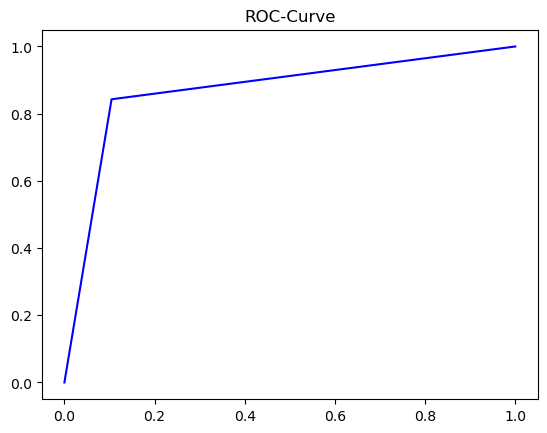

In [365]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Decision Tree

In [366]:
dt.fit(u_x_train,u_y_train)

DecisionTreeClassifier()

In [367]:
dt_p=dt.predict(u_x_test)

In [368]:
dt_c=confusion_matrix(dt_p,u_y_test)
dt_c

array([[8584,   32],
       [  37, 8585]], dtype=int64)

In [369]:
dt1_f1=f1_score(dt_p,u_y_test)
dt1_f1

0.9959974476477754

In [370]:
dt1_pe=precision_score(dt_p,u_y_test)
dt1_pe

0.9962864105837298

In [371]:
dt1_re=recall_score(dt_p,u_y_test)
dt1_re

0.9957086522848527

In [372]:
dt_ac=dt_c.diagonal().sum()/dt_c.sum()*100
dt_ac

99.59972154542291

In [373]:
print(classification_report(dt_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8616
           1       1.00      1.00      1.00      8622

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# ROC Curve

In [374]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,dt_p)

Text(0.5, 1.0, 'ROC-Curve')

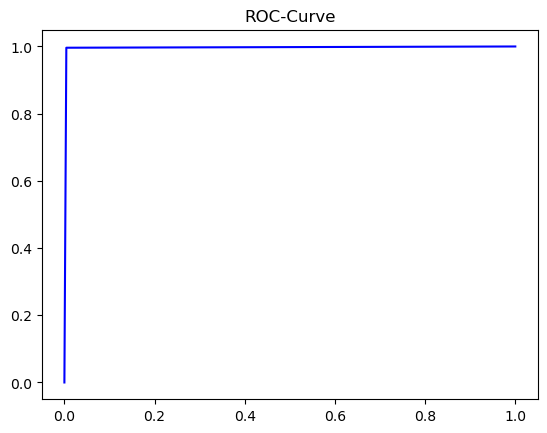

In [375]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Random Forest

In [376]:
rf.fit(u_x_train,u_y_train)

RandomForestClassifier()

In [377]:
rf_p=rf.predict(u_x_test)

In [378]:
rf_c=confusion_matrix(rf_p,u_y_test)
rf_c

array([[8621,   43],
       [   0, 8574]], dtype=int64)

In [379]:
rf1_f1=f1_score(rf_p,u_y_test)
rf1_f1

0.9974986911756152

In [380]:
rf1_pe=precision_score(rf_p,u_y_test)
rf1_pe

0.995009864221887

In [381]:
rf1_re=recall_score(rf_p,u_y_test)
rf1_re

1.0

In [382]:
rf_ac=rf_c.diagonal().sum()/rf_c.sum()*100
rf_ac

99.75055110801718

In [383]:
print(classification_report(rf_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8664
           1       1.00      1.00      1.00      8574

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# ROC Curve

In [384]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,rf_p)

Text(0.5, 1.0, 'ROC-Curve')

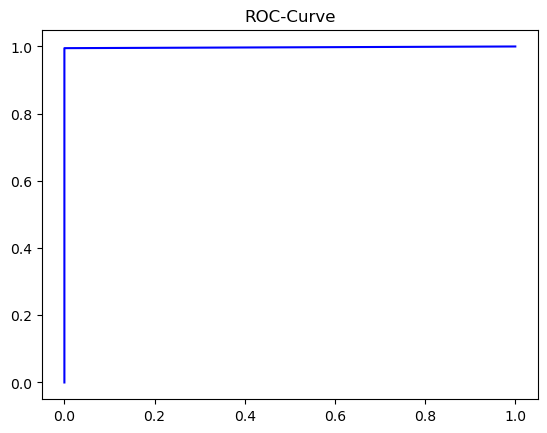

In [385]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# KNN

In [386]:
knn.fit(u_x_train,u_y_train)

KNeighborsClassifier(n_neighbors=40)

In [387]:
knn_p=knn.predict(u_x_test)

In [388]:
knn_c=confusion_matrix(knn_p,u_y_test)
knn_c

array([[5480, 4317],
       [3141, 4300]], dtype=int64)

In [389]:
k1_f1=f1_score(knn_p,u_y_test)
k1_f1

0.5355586000747292

In [390]:
k1_pe=precision_score(knn_p,u_y_test)
k1_pe

0.49901357781130323

In [391]:
k1_re=recall_score(knn_p,u_y_test)
k1_re

0.5778793172960623

In [392]:
knn_ac=knn_c.diagonal().sum()/knn_c.sum()*100
knn_ac

56.73512008353637

In [393]:
print(classification_report(knn_p,u_y_test))

              precision    recall  f1-score   support

           0       0.64      0.56      0.60      9797
           1       0.50      0.58      0.54      7441

    accuracy                           0.57     17238
   macro avg       0.57      0.57      0.57     17238
weighted avg       0.58      0.57      0.57     17238



# ROC Curve

In [394]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,knn_p)

Text(0.5, 1.0, 'ROC-Curve')

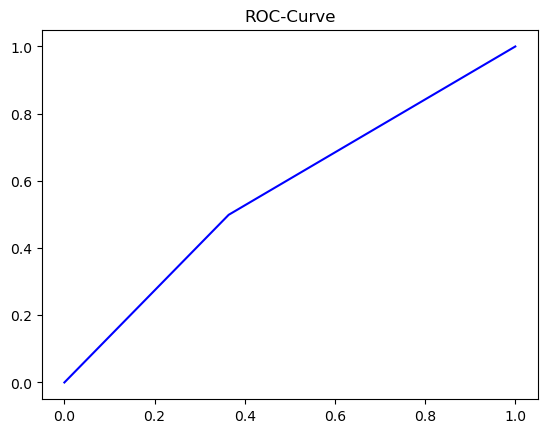

In [395]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Support Vector Machine

In [396]:
svc.fit(u_x_train,u_y_train)

SVC()

In [397]:
svc_p=svc.predict(u_x_test)

In [398]:
svc_c=confusion_matrix(svc_p,u_y_test)
svc_c

array([[4149, 3064],
       [4472, 5553]], dtype=int64)

In [399]:
s1_f1=f1_score(svc_p,u_y_test)
s1_f1

0.5957515288059221

In [400]:
s1_pe=precision_score(svc_p,u_y_test)
s1_pe

0.6444238133921318

In [401]:
s1_re=recall_score(svc_p,u_y_test)
s1_re

0.5539152119700748

In [402]:
svc_ac=svc_c.diagonal().sum()/svc_c.sum()*100
svc_ac

56.28263139575357

In [403]:
print(classification_report(svc_p,u_y_test))

              precision    recall  f1-score   support

           0       0.48      0.58      0.52      7213
           1       0.64      0.55      0.60     10025

    accuracy                           0.56     17238
   macro avg       0.56      0.56      0.56     17238
weighted avg       0.58      0.56      0.57     17238



# ROC Curve

In [404]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,svc_p)

Text(0.5, 1.0, 'ROC-Curve')

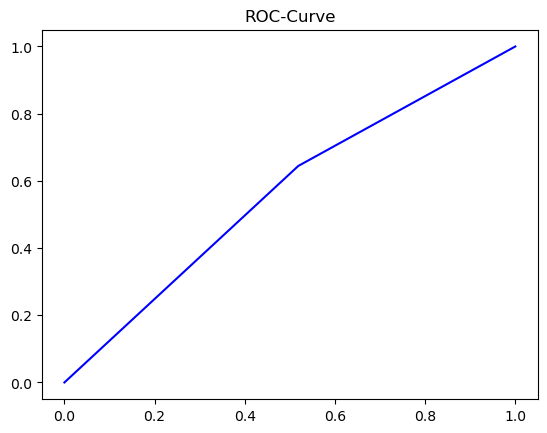

In [405]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# ADA Boosting

In [406]:
adbo1.fit(u_x_train,u_y_train)

AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=2)

In [407]:
ad_p=adbo1.predict(u_x_test)

In [408]:
ad_c=confusion_matrix(ad_p,u_y_test)
ad_c

array([[8588,   36],
       [  33, 8581]], dtype=int64)

In [409]:
ad1_f1=f1_score(ad_p,u_y_test)
ad1_f1

0.9959955893447856

In [410]:
ad1_pe=precision_score(ad_p,u_y_test)
ad1_pe

0.9958222119066961

In [411]:
ad1_re=recall_score(ad_p,u_y_test)
ad1_re

0.9961690271650802

In [412]:
ad_ac=ad_c.diagonal().sum()/ad_c.sum()*100
ad_ac

99.59972154542291

In [413]:
print(classification_report(ad_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8624
           1       1.00      1.00      1.00      8614

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# ROC Curve

In [414]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,ad_p)

Text(0.5, 1.0, 'ROC-Curve')

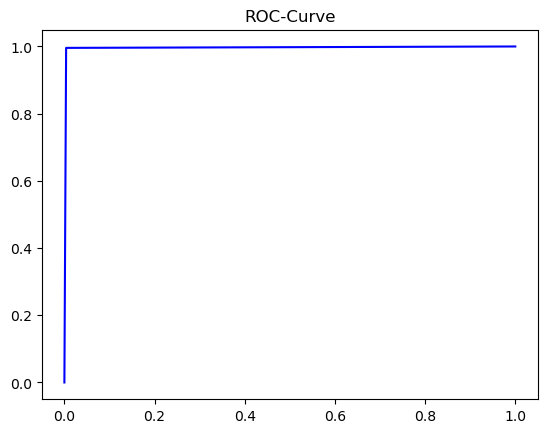

In [415]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# XG Boosting

In [416]:
xgb1.fit(u_x_train,u_y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [417]:
xg_p=xgb1.predict(u_x_test)

In [418]:
xg_c=confusion_matrix(xg_p,u_y_test)
xg_c

array([[8620,   23],
       [   1, 8594]], dtype=int64)

In [419]:
xgb1_f1=f1_score(xg_p,u_y_test)
xgb1_f1

0.9986056239832676

In [420]:
xgb1_pe=precision_score(xg_p,u_y_test)
xgb1_pe

0.9973308576070559

In [421]:
xgb1_re=recall_score(xg_p,u_y_test)
xgb1_re

0.9998836532867946

In [422]:
xg_ac=xg_c.diagonal().sum()/xg_c.sum()*100
xg_ac

99.86077271145145

In [423]:
print(classification_report(xg_p,u_y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8643
           1       1.00      1.00      1.00      8595

    accuracy                           1.00     17238
   macro avg       1.00      1.00      1.00     17238
weighted avg       1.00      1.00      1.00     17238



# ROC Curve

In [424]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,xg_p)

Text(0.5, 1.0, 'ROC-Curve')

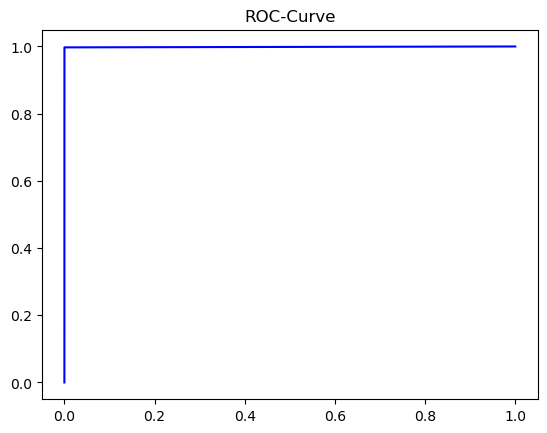

In [425]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

# Navy Bayes

In [426]:
nb.fit(u_x_train,u_y_train)

MultinomialNB()

In [427]:
nb_p=nb.predict(u_x_test)

In [428]:
nb_c=confusion_matrix(nb_p,u_y_test)
nb_c

array([[3644, 2797],
       [4977, 5820]], dtype=int64)

In [429]:
n1_f1=f1_score(nb_p,u_y_test)
n1_f1

0.5995673225507365

In [430]:
n1_pe=precision_score(nb_p,u_y_test)
n1_pe

0.6754090750841361

In [431]:
n1_re=recall_score(nb_p,u_y_test)
n1_re

0.5390386218393999

In [432]:
nb_ac=nb_c.diagonal().sum()/nb_c.sum()*100
nb_ac

54.90196078431373

In [433]:
print(classification_report(nb_p,u_y_test))

              precision    recall  f1-score   support

           0       0.42      0.57      0.48      6441
           1       0.68      0.54      0.60     10797

    accuracy                           0.55     17238
   macro avg       0.55      0.55      0.54     17238
weighted avg       0.58      0.55      0.56     17238



# ROC Curve

In [434]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds=roc_curve(u_y_test,nb_p)

Text(0.5, 1.0, 'ROC-Curve')

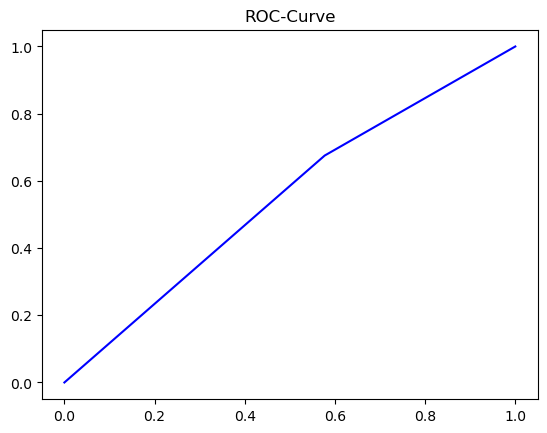

In [435]:
plt.plot(fpr,tpr,color='blue',label='ROC')
plt.title("ROC-Curve")

In [436]:
list1=["Logistic Regression","Decision Tree","Random Forest","Ada Boost","XG Boost","SVM","KNN","Naive Bayes"]
list2=[a1,dt_ac,rf_ac,ad_ac,xg_ac,svc_ac,knn_ac,nb_ac]
list3=[lg1_f1,dt1_f1,rf1_f1,ad1_f1,xgb1_f1,s1_f1,k1_f1,n1_f1]
list4=[lg1_pe,dt1_pe,rf1_pe,ad1_pe,xgb1_pe,s1_pe,k1_pe,n1_pe]
list5=[lg1_re,dt1_re,rf1_re,ad1_re,xgb1_re,s1_re,k1_re,n1_re]

In [437]:
#after eda treatment
df1=pd.DataFrame({"Model Name":list1,"Accuracy":list2,"F1_Score":list3,"Precision_Score":list4,"Recall_Score":list5})
df1

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,86.912635,0.865570,0.842869,0.889528
1,Decision Tree,99.599722,0.995997,0.996286,0.995709
2,Random Forest,99.750551,0.997499,0.995010,1.000000
3,Ada Boost,99.599722,0.995996,0.995822,0.996169
4,XG Boost,99.860773,0.998606,0.997331,0.999884
5,SVM,56.282631,0.595752,0.644424,0.553915
6,KNN,56.735120,0.535559,0.499014,0.577879
7,Naive Bayes,54.901961,0.599567,0.675409,0.539039


In [438]:
#Before Eda treatment
df

,Model Name,Accuracy,F1_Score,Precision_Score,Recall_Score
0,Logistic Regression,99.582222,0.978117,0.961772,0.995027
1,Decision Tree,99.876667,0.993649,0.993819,0.993478
2,Random Forest,99.867778,0.993143,0.986380,1.000000
3,Ada Boost,99.883333,0.993989,0.993590,0.994387
4,XG Boost,99.963333,0.998108,0.996223,1.000000
5,SVM,98.840000,0.936812,0.885773,0.994091
6,KNN,92.307778,0.344102,0.207852,0.998900
7,Naive Bayes,79.873333,0.468111,0.912327,0.314823


# Conclusion

#By comparing df and df1 then "Decision tree","Random Forest","Ada Boost","Xg Boost","SVM","KNN","Naive Bayes" these models are over fitted in both the conditions(before and after treating outilers).so here logistic regression is best fitted model.